In [808]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
os.listdir()

['.Rhistory',
 '.DS_Store',
 'data_processed',
 '02_summary_loop.R',
 'Untitled.ipynb',
 'export_result_oct21_with_function.xlsx',
 '02_summary_tables.R',
 'export_result_oct21.xlsx',
 '.RData',
 '.ipynb_checkpoints',
 'data_raw',
 '01_load_clean.R',
 'processing_basic.ipynb']

In [3]:
xls_sheet_name = pd.ExcelFile("export_result_oct21.xlsx").sheet_names
print(xls_sheet_name)

['Dec23', 'Jan24', 'Feb24', 'Mar24', 'Apr24', 'May24', 'Jun24', 'Jul24', 'Aug24', 'Sep24', 'Oct24', 'Nov24']


In [4]:
df = pd.read_excel("export_result_oct21.xlsx", sheet_name=xls_sheet_name[0])
df.head()

,food_items,quantity,sum_of_portionunitstandard_g,gwp_of_1_kg_food,gwp_x_kg,Unnamed: 5,Unnamed: 6,food_items.1,quantity.1,sum_of_portionunitstandard_g.1,gwp_of_1_kg_food.1,gwp_x_kg.1,Unnamed: 12,Unnamed: 13,food_items.2,quantity.2,sum_of_portionunitstandard_g.2,gwp_of_1_kg_food.2,gwp_x_kg.2
0,A_beef_consumed_ON,16098,1444621.5,55.64676,80388.505901,NaN,NaN,A_beef_consumed_ON,16098,1444621.5,55.64676,80388.505901,NaN,NaN,A_beef_consumed_ON,16098,1444621.5,8.15745,11784.427655
1,Vegetables_MontegoBlend,8502,638964,3.44,2198.036160,NaN,NaN,A_mixed_meat_consumed_ON,701,43586,33.62227,1465.46026,NaN,NaN,A_mixed_meat_consumed_ON,701,43586,33.62227,1465.46026
2,A_mixed_meat_consumed_ON,701,43586,33.62227,1465.460260,NaN,NaN,A_butter_consumed_ON,17511,59515.5,19.79185,1177.921849,NaN,NaN,A_butter_consumed_ON,17511,59515.5,19.79185,1177.921849
3,A_butter_consumed_ON,17511,59515.5,19.79185,1177.921849,NaN,NaN,A_pork_consumed_ON,1664,259183,11.14398,2888.330168,NaN,NaN,A_pork_consumed_ON,1664,259183,11.14398,2888.330168
4,Pizza_Flatbread_Cheese_Flatbred_Tomato,721,53314,15.17,808.773380,NaN,NaN,A_cheese_consumed_ON,31753,707440,11.13663,7878.497527,NaN,NaN,A_cheese_consumed_ON,31753,707440,11.13663,7878.497527


# Fig 1

In [5]:
n = [31371,31528,30350,29327,34716,38380,35736,36005,36577,36099,38882,37084]
patient = {}
for i in range(0,len(n)):
    #print(i)
    patient[xls_sheet_name[i]] = n[i]

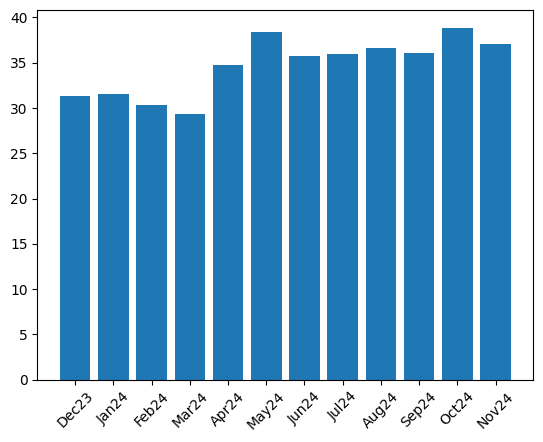

In [20]:
plt.bar(patient.keys(), [n / 1000 for n in patient.values()])
plt.xticks(rotation=45)
plt.show()

In [1]:
import pandas as pd

file_path = "export_result_oct21.xlsx"

months = [
    "Dec23","Jan24","Feb24","Mar24","Apr24","May24",
    "Jun24","Jul24","Aug24","Sep24","Oct24","Nov24"
]

xl = pd.ExcelFile(file_path)

for sheet in months:
    df = pd.read_excel(xl, sheet_name=sheet)

    # === TABLE 1 === (A–E → columns 0:5, dynamic length)
    # Detect where table 2 starts ("food_items" in col A)
    food_start = df.index[df.iloc[:, 0].astype(str).str.lower().eq("food_items")]
    if len(food_start) > 0:
        end_t1 = food_start[0]
    else:
        end_t1 = len(df)
    table1 = df.iloc[:end_t1, 0:5].dropna(how="all")

    # === TABLE 2 === (A–D → columns 0:4, starts at "food_items")
    if len(food_start) > 0:
        start_t2 = food_start[0]
        # find next blank row to determine end
        after = df.iloc[start_t2+1:, 0].isna()
        if after.any():
            end_t2 = after.idxmax()
        else:
            end_t2 = len(df)
        table2 = df.iloc[start_t2:end_t2, 0:4].dropna(how="all")
        table2.drop(table2.index[0], inplace=True)
    else:
        table2 = pd.DataFrame()
        table2.drop(table2.index[0], inplace=True)
        
    if table2.shape[1] == 4:
        table2.columns = ['food_items', 'quantity', 'sum_of_portionunitstandard_g', 'sum_of_portionunitstandard_kg']
       
    
    # === ANIMAL & SUMMARY (H–L: cols 7–12) ===
    animal = df.iloc[0:17, 7:12].dropna(how="all")
    animal_name = ['food_items', 'quantity', 'sum_of_portionunitstandard_g',
       'gwp_of_1_kg_food', 'gwp_x_kg']
    animal.columns = animal_name
    
    summary = df.iloc[18:23, 7:12].dropna(how="all")
    summary_name = ['variables', 'mass_kg', 'percentage_kg', 'gwp_total', 'percentage_gwp']
    summary.columns = summary_name

    # === ANIMAL_S & SUMMARY_S (O–S: cols 14–19) ===
    animal_s = df.iloc[0:17, 14:19].dropna(how="all")
    animal_s.columns = animal_name
    summary_s = df.iloc[18:23, 14:19].dropna(how="all")
    summary_s.columns = summary_name

    # === DROP completely empty columns (in case of blanks)
    table1 = table1.dropna(axis=1, how="all")
    table2 = table2.dropna(axis=1, how="all")
    if table2.shape[1] == 3:
        table2.columns = ['food_items', 'sum_of_portionunitstandard_g', 'sum_of_portionunitstandard_kg']
        #print(sheet)

    # === Assign to variables dynamically ===
    suffix = sheet[:3].lower()  # e.g., dec, jan, feb
    globals()[f"{suffix}_table1"]   = table1
    globals()[f"{suffix}_table2"]   = table2
    globals()[f"{suffix}_animal"]   = animal
    globals()[f"{suffix}_summary"]  = summary
    globals()[f"{suffix}_animal_s"] = animal_s
    globals()[f"{suffix}_summary_s"]= summary_s

    #print(f"✅ Extracted all tables for {sheet}")

print("All months processed and loaded into variables.")

All months processed and loaded into variables.


In [64]:
dec_summary.iloc[3, 3]

280552.1181408852

In [75]:
summary

,variables,mass_kg,percentage_kg,gwp_total,percentage_gwp
18,Animal prodcuts on Menu,21786.4761,26.5,176592.215053,55.71
19,Everything else on menu w/ estimates for GWP,52082.67062,63.36,121030.67706,38.18
20,Unestimated Food Mass,8330.7994,10.13,19359.266332,6.11
21,Total,82199.94612,100,316982.158445,100


In [91]:
fig_1 = pd.DataFrame(index=[name[:3] for name in xls_sheet_name], 
                     columns=["patient",
                             "total_gwp"])
fig_1['patient'] = [31371,31528,30350,29327,34716,38380,35736,36005,36577,36099,38882,37084]

for month in[name[:3] for name in xls_sheet_name]:
    df = globals().get(f"{month.lower()}_summary")
    #print(month)
    #print(df.iloc[3, 3])
    fig_1.loc[month,'total_gwp'] = df.iloc[3, 3]

fig_1['gwp_per_bed'] = fig_1['total_gwp'] / fig_1['patient']
fig_1

,patient,total_gwp,gwp_per_bed
Dec,31371,280552.118141,8.94304
Jan,31528,348712.848043,11.060418
Feb,30350,284173.642037,9.363217
Mar,29327,301420.549161,10.27792
Apr,34716,306021.572844,8.815001
May,38380,290691.226026,7.574029
Jun,35736,289773.896162,8.108739
Jul,36005,291497.934422,8.09604
Aug,36577,294511.518677,8.051823
Sep,36099,305135.481654,8.452741


In [359]:
#fig_1.to_clipboard()

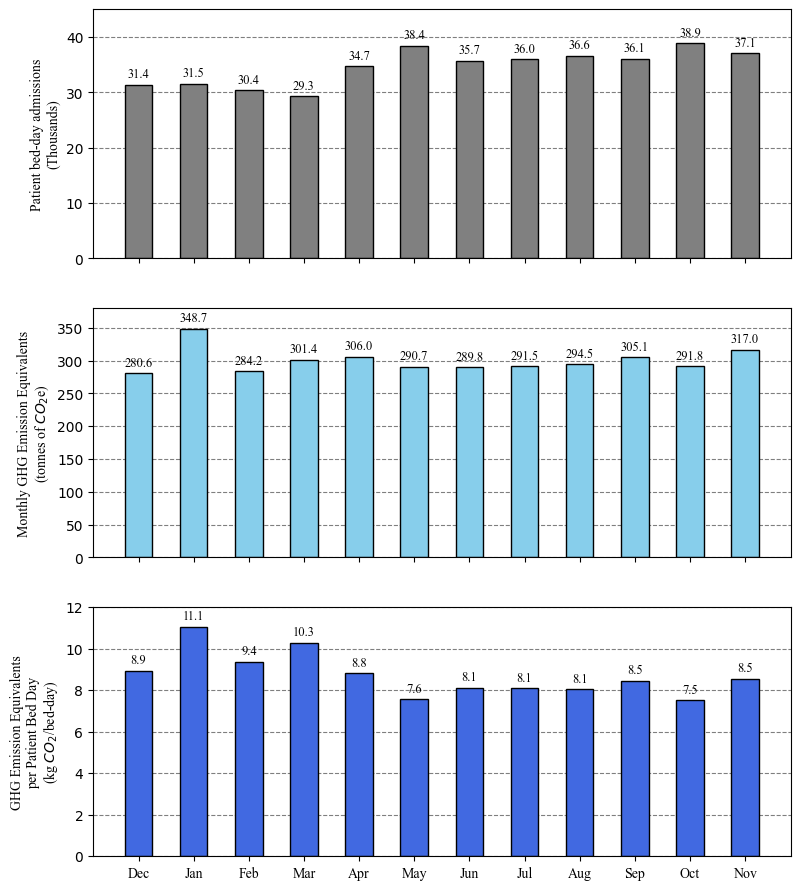

In [169]:
# === PLOTTING ===
fig, axes = plt.subplots(3, 1, figsize=(9, 11), sharex=True)

# 1️⃣ Patients (thousands)
bars1 = axes[0].bar(fig_1.index, fig_1["patient"]/1000, color="gray", width=0.5, edgecolor='k')
axes[0].set_ylabel("Patient bed-day admissions\n(Thousands)", fontname='Times New Roman')
#axes[0].set_title("Monthly Patients (×1000)")
axes[0].bar_label(bars1, labels=[f"{v/1000:.1f}" for v in fig_1["patient"]], padding=3, fontsize=9, fontname='Times New Roman')
axes[0].set_ylim(top=45)

# 2️⃣ Total GWP (tonnes CO₂e)
bars2 = axes[1].bar(fig_1.index, fig_1["total_gwp"]/1000, color="skyblue",  width=0.5, edgecolor='k')
axes[1].set_ylabel("Monthly GHG Emission Equivalents\n(tonnes of $CO_2$e)", fontname='Times New Roman')
#axes[1].set_title("Total GWP per Month (tonnes CO₂e)")
axes[1].bar_label(bars2, labels=[f"{v/1000:.1f}" for v in fig_1["total_gwp"]], padding=3, fontsize=9, fontname='Times New Roman')
axes[1].set_ylim(top=380)

# 3️⃣ GWP per bed (kg CO₂e per bed)
bars3 = axes[2].bar(fig_1.index, fig_1["gwp_per_bed"], color="royalblue",  width=0.5, edgecolor='k')
axes[2].set_ylabel("GHG Emission Equivalents\nper Patient Bed Day\n(kg $CO_2$/bed-day)", fontname='Times New Roman')
#axes[2].set_title("GWP per Bed (kg CO₂e/bed)")
axes[2].bar_label(bars3, labels=[f"{v:.1f}" for v in fig_1["gwp_per_bed"]], padding=3, fontsize=9, fontname='Times New Roman')
axes[2].set_ylim(top=12)
axes[2].set_xticks(fig_1.index,fig_1.index,fontname='Times New Roman')

# Formatting
for ax in axes:
    ax.grid(axis='y', linestyle='--', alpha=0.5, color = 'k')
    ax.set_axisbelow(True)

#plt.xlabel("Month")
#plt.tight_layout()
#plt.savefig('fig1_0.png', dpi=500)
plt.show()

# Fig 2

In [279]:
beef = ['A_beef_consumed_ON']
dec_animal[dec_animal['food_items'].isin(beef)]['gwp_x_kg'].sum()

80388.50590134

In [185]:
all_other_animal = [
    "A_chicken_consumed_ON",
    "Turkey_Proxy_Chicken_Consumed",
    "Haddock_Bianchietal2022",
    "A_mixed_meat_consumed_ON",
    "Tuna_Bianchietal2022",
    "Cod_Bianchietal2022",
    "A_salmon_consumed_ON",
    "A_pork_consumed_ON"
]

dec_animal[dec_animal['food_items'].isin(all_other_animal)]['gwp_x_kg'].sum()

19568.400977975

In [189]:
dairy = [
    "A_milk_consumed_ON",
    "S_icecream_consumed_ON",
    "A_cheese_consumed_ON",
    "A_yogurt_consumed_ON",
    "A_egg_consumed_ON",
    "A_butter_consumed_ON",
    "O_margarine_consumed_ON"
    
]

dec_table1[dec_table1['food_items'].isin(dairy)]['gwp_x_kg'].sum()

np.float64(56331.135398875005)

In [206]:
vegetables = [
    # Vegetables
    "V_cucumber_consumed_ON",
    "V_lettuce_consumed_ON",
    "V_cauliflower_consumed_ON",
    "V_tomato_heated_consumed_ON",
    "V_pepper_consumed_ON",
    "V_celery_consumed_ON",
    "V_spinach_consumed_ON",
    "V_sugarbeet_consumed_ON",
    "V_tomato_unheated_greenhouse_consumed_ON",
    "V_broccoli_consumed_ON",
    "V_greenpea_consumed_ON",
    "V_onion_consumed_ON",
    "V_tomato_paste_consumed_ON",
    "V_corn_consumed_ON",
    "V_cabbage_consumed_ON",
    "V_potato_consumed_ON",
    "V_carrot_consumed_ON",
    "Greenbeans_Proxy_chickpeas",
    "Vegetables_MontegoBlend",

    # Fruits
    "F_peach_consumed_ON",
    "F_grape_consumed_ON",
    "F_mandarin_consumed_ON",
    "F_orange_consumed_ON",
    "F_strawbery_consumed_ON",
    "F_pear_consumed_ON",
    "F_apple_consumed_ON",
    "F_pineapple_consumed_ON",
    "F_melon_consumed_ON",
    "F_banana_consumed_ON",
    "F_orange_juice_consumed_ON",
    "S_ice_fruit_consumed_ON",     # fruit-based sweet (optional, related to fruits)
    "F_candied_fruit_consumed_ON", # optional sweet fruit item
    "PeachJuice_Proxy_OrangeJuice"
]

dec_table1[dec_table1['food_items'].isin(vegetables)]['gwp_x_kg'].sum()

np.float64(22860.080681655993)

In [212]:
grains = [
    "G_pasta_consumed_ON",
    "G_bread_consumed_ON",
    "G_rice_consumed_ON",
    "G_oat_consumed_ON",
    "G_cornflakes_consumed_ON",
    "CreamofWheat_Poore&Nemecek",
    "Muffin_Proxy_Bread_Sugar",
    #"Cookies_Proxy_Bread+Sugar",
    "FrenchToast_Proxy_Eggs_Bread",
    "Pizza_Flatbread_Cheese_Flatbred_Tomato",
    
]

dec_table1[dec_table1['food_items'].isin(grains)]['gwp_x_kg'].sum()

np.float64(13994.52280056)

In [226]:
plant_protein = [
    "P_tofu_consumed_ON",
    "P_chickpea_consumed_ON",
    "P_beans_proxy_chickpea_consumed_ON",
    "P_soybean_consumed_ON",
    "VeggieBurg_Soy_Wheat_Fresán",
]


dec_table1[dec_table1['food_items'].isin(plant_protein)]['gwp_x_kg'].sum()

np.float64(323.2375845)

In [252]:
supp_drinks = [
    "Supp_EnsureChocolate_Water_WheyProtein_Sugar",
    "Supp_VitalPeptide_Water_WheyProtein_Sugar",
    "Supp_Beneproteinpowder_WheyProtein",
    "Supp_Resource_Water_Milk_SoyProtein_Sugar",
    "Supp_EnsureVanillaStrawberry_Water_SoyProtein_Milk",
    "Supp_Glucerna_Water_Milk_SoyProtein",
    "Supp_NovaSource_Water_Milk_SoyProtein",
    "Supp_Sperri_PeaProtein_Water_Sugar",
    "Supp_Isosource+HN_MilkProtein_SoyProtein_Water_Sugar",
    "PromoteVanilla_Water_SoyProtein_Sugar" # only july
    
    #"Supp_Peptamen_TF", # no data
    #"Peptamen_Water_Sugar_WheyProtein", #no data
    #"Supp_BoostDrinkDiabetic_Water_SoyProtein_Milk", #new
    #"Supp_BoostDrink_Water_Sugar_WheyProtein_Poore&Nemecek", #new
]


dec_table1[dec_table1['food_items'].isin(supp_drinks)]['gwp_x_kg'].sum()

np.float64(29081.96131)

In [278]:
beverages = [
    'F_orange_juice_consumed_ON',
    "PeachJuice_Proxy_OrangeJuice",
    "B_coffee_brewed_consumed_ON",
    "B_tea_brewed_consumed_ON",
    "B_water_at_consumed_ON",
    "B_carbonated_drink_consumed_ON",
    "B_pbbalmond_consumed_ON",
    "B_liquor_consumed_ON",
    "B_wine_consumed_ON",
    "B_beer_consumed_ON",
]

dec_table1[dec_table1['food_items'].isin(beverages)]['gwp_x_kg'].sum()

np.float64(7081.479702816)

In [283]:
desserts = [
    #"S_chocolate_HH_consumed_ON",
    #"S_icecream_consumed_ON",
    #"S_sugar_consumed_ON",
    #"S_tortillachips_consumed_ON",
    #"S_ice_fruit_consumed_ON",
    #"Muffin_Proxy_Bread_Sugar",   
    #"S_potatochips_consumed_ON",  #no data
    #"S_popcorn_consumed_ON",      #no data
    "S_candied_fruit_consumed_ON",
    "Cookies_Proxy_Bread+Sugar",
    "AppleSauce_Sweetened_Apples+Sugar",
    "Apple_Oat_Sugar",
    "Sorbet_Water_Sugar_Orange",
    "MagicCup_Proxy_Icecream ",
    "PuddingCup_Proxy_Milk_Eggs_Sugar_Consumed"
]

jan_table1[jan_table1['food_items'].isin(desserts)]#['gwp_x_kg'].sum()

,food_items,quantity,sum_of_portionunitstandard_g,gwp_of_1_kg_food,gwp_x_kg
12,PuddingCup_Proxy_Milk_Eggs_Sugar_Consumed,15468,1490712,8.44,12581.609280
21,MagicCup_Proxy_Icecream,6228,7311718,4.91,35900.535380
31,Apple_Oat_Sugar,126,16254,3.53,57.376620
35,Cookies_Proxy_Bread+Sugar,18088,324588,3.13,1015.960440
40,AppleSauce_Sweetened_Apples+Sugar,50,5650,2.82,15.933000
62,S_candied_fruit_consumed_ON,6146,688122,1.02212,703.343259
75,Sorbet_Water_Sugar_Orange,6938,749225,5.23,3918.446750


In [281]:
fig_2 = pd.DataFrame(columns=[name[:3] for name in xls_sheet_name],
                   index=['Beef', 'All Other Animal Meat/Fish', 
                          'Dairy & Alternatives',
                          'Vegetables & Fruits',
                          'Grains & Starches',
                          'Plant Based Proteins',
                          'Supplement Drinks',
                          'Beverages',
                          'Desserts'])

for month in[name[:3] for name in xls_sheet_name]:
    df = globals().get(f"{month.lower()}_table1")
    
    fig_2.loc['Beef', month] = df[df['food_items'].isin(beef)]['gwp_x_kg'].sum()
    fig_2.loc['All Other Animal Meat/Fish', month] = df[df['food_items'].isin(all_other_animal)]['gwp_x_kg'].sum()
    fig_2.loc['Dairy & Alternatives', month] = df[df['food_items'].isin(dairy)]['gwp_x_kg'].sum()
    fig_2.loc['Vegetables & Fruits', month] = df[df['food_items'].isin(vegetables)]['gwp_x_kg'].sum()
    fig_2.loc['Grains & Starches', month] = df[df['food_items'].isin(grains)]['gwp_x_kg'].sum()
    fig_2.loc['Plant Based Proteins', month] = df[df['food_items'].isin(plant_protein)]['gwp_x_kg'].sum()
    fig_2.loc['Supplement Drinks', month] = df[df['food_items'].isin(supp_drinks)]['gwp_x_kg'].sum()
    fig_2.loc['Beverages', month] = df[df['food_items'].isin(beverages)]['gwp_x_kg'].sum()
    fig_2.loc['Desserts', month] = df[df['food_items'].isin(desserts)]['gwp_x_kg'].sum()

fig_2

,Dec,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov
Beef,80388.505901,84655.555105,81092.159182,75244.853287,91835.545254,78204.314925,74112.441721,79436.779365,106363.662238,99245.773873,79749.291569,100801.212108
All Other Animal Meat/Fish,19568.400978,17887.749488,18587.171684,18364.760594,17915.860577,17705.367971,25080.817221,18418.359405,14294.101264,17567.203593,17755.836409,18128.368707
Dairy & Alternatives,56331.135399,60181.438215,52825.793721,56308.43909,62080.504124,57911.229862,57295.996941,58927.472364,56349.095217,57467.849181,56914.736674,58202.895917
Vegetables & Fruits,22860.080682,24143.049895,24536.931078,24301.482214,24855.06038,24072.336579,23679.870151,23934.108227,23579.566732,23661.924833,23597.972807,24667.498463
Grains & Starches,13994.522801,14562.885925,14806.493039,17283.349754,14883.036084,21486.937352,14667.017268,14684.315441,14734.996609,14900.976482,18266.95683,15390.024769
Plant Based Proteins,323.237585,355.42473,401.652138,381.465588,432.801021,452.872339,386.407438,384.337009,389.522543,422.088502,483.335801,461.633059
Supplement Drinks,29081.96131,42324.55588,33129.69931,49075.81662,37663.76086,36740.60244,37310.53332,35316.75119,26069.79664,46979.2966,46815.65383,52295.99773
Beverages,7081.479703,7334.354806,5570.744764,4887.947193,5991.948486,5208.874838,5272.534479,5291.603562,5246.362083,5197.811035,5285.85189,5430.64492
Desserts,20965.645831,54472.771324,20451.362062,19562.87834,21709.390821,22244.442162,21901.200942,20378.61735,21952.161826,21561.795759,21418.279297,22884.858361


In [286]:
fig_2.to_clipboard()

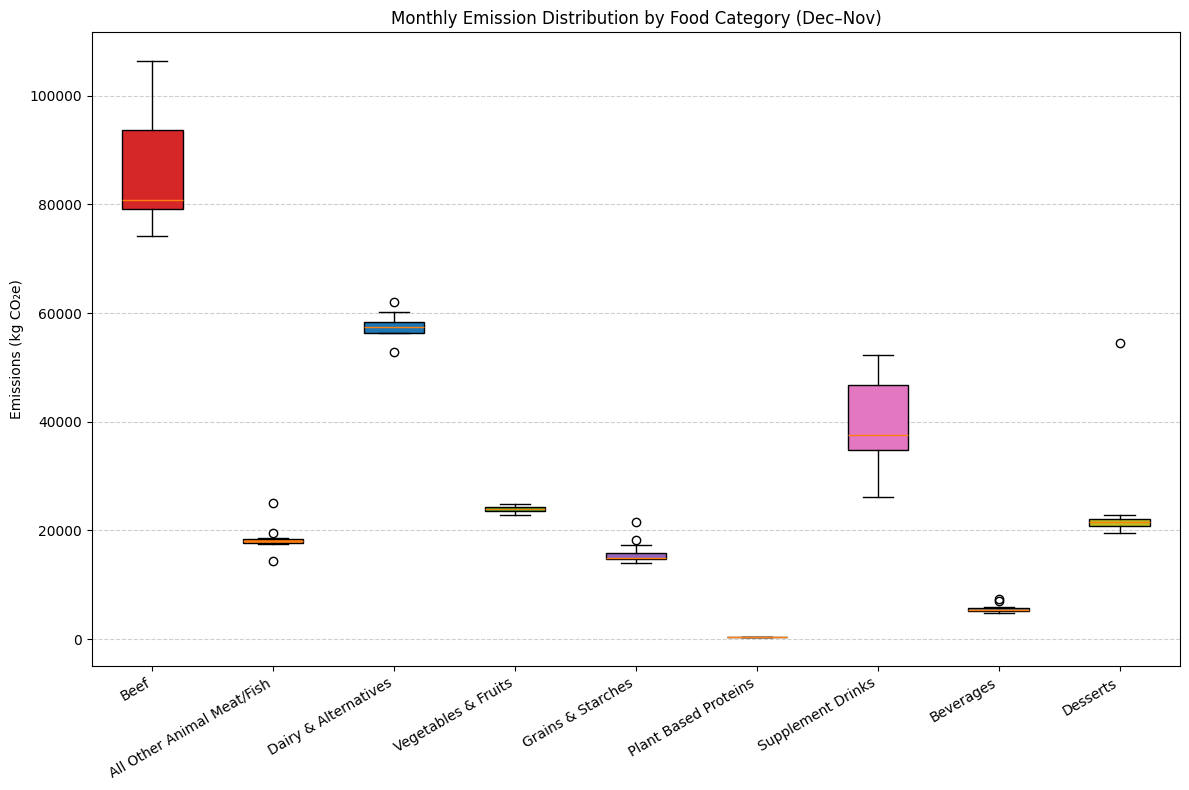

In [309]:
plt.figure(figsize=(12, 8))
box = plt.boxplot(fig_2.T, patch_artist=True, tick_labels=fig_2.T.columns)

# Custom colors for variety
colors = ["#d62728", "#ff7f0e", "#1f77b4", "#2ca02c", "#9467bd",
          "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22"]
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.ylabel("Emissions (kg CO₂e)")
plt.title("Monthly Emission Distribution by Food Category (Dec–Nov)")
plt.xticks(rotation=30, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

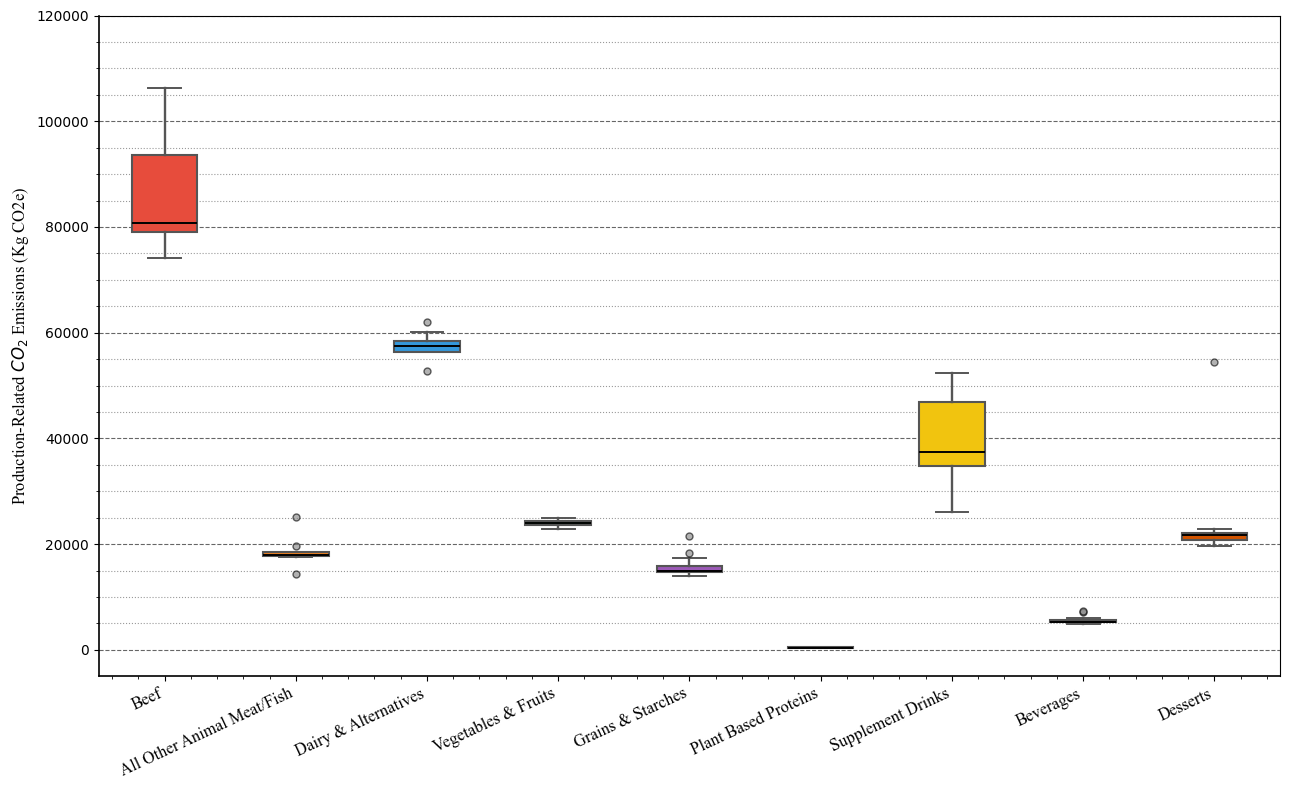

In [357]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 8))

# === Boxplot ===
box = plt.boxplot(
    fig_2.T,
    patch_artist=True,
    tick_labels=fig_2.T.columns,
    boxprops=dict(linewidth=1.5, color="#555"),
    medianprops=dict(color="black", linewidth=1.4),
    whiskerprops=dict(color="#555", linewidth=1.7),
    capprops=dict(color="#555", linewidth=1.4),
    flierprops=dict(marker='o', markersize=5, markerfacecolor='gray', alpha=0.6)
)

# === Color each box ===
colors = [
    "#E74C3C", "#E67E22", "#3498DB", "#2ECC71", "#9B59B6",
    "#1ABC9C", "#F1C40F", "#95A5A6", "#D35400"
]
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    #patch.set_alpha(0.7)

# === Grid and labels ===
plt.grid(axis='y', linestyle='--', alpha=0.6, c='k')
plt.ylabel("Production-Related $CO_2$ Emissions (Kg CO2e)", fontsize=12, fontname='Times New Roman')
#plt.title("Monthly Emission Distribution by Food Category (Dec–Nov)", fontsize=14, weight='bold', fontname='Times New Roman')
plt.xticks(rotation=25, ha='right', fontsize=12, fontname='Times New Roman')
plt.yticks(fontsize=10)

# === Optional: thicker axis lines ===
plt.gca().spines['bottom'].set_linewidth(1.2)
plt.gca().spines['left'].set_linewidth(1.2)

plt.ylim(top = 120000)   # Adjust visible range
#plt.yscale("linear")  # Or "log" for wide ranges
plt.minorticks_on()   # Adds minor grid lines
plt.grid(which='minor', axis='y', linestyle=':', alpha=0.4, c='k')


plt.tight_layout()
#plt.savefig('fig2.png', dpi=500)
plt.show()

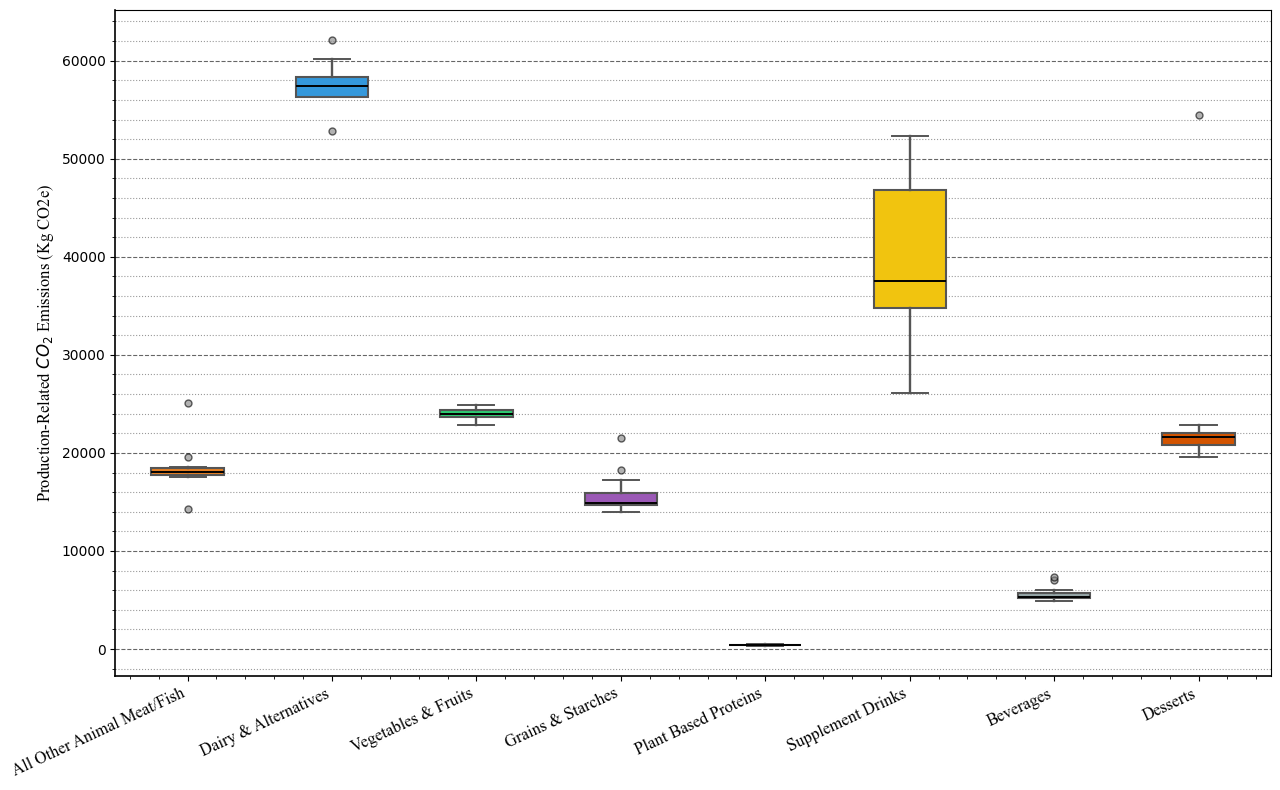

In [708]:

plt.figure(figsize=(13, 8))

# === Boxplot ===
box = plt.boxplot(
    fig_2.drop(['Beef']).T,
    patch_artist=True,
    tick_labels=fig_2.drop(['Beef']).T.columns,
    boxprops=dict(linewidth=1.5, color="#555"),
    medianprops=dict(color="black", linewidth=1.4),
    whiskerprops=dict(color="#555", linewidth=1.7),
    capprops=dict(color="#555", linewidth=1.4),
    flierprops=dict(marker='o', markersize=5, markerfacecolor='gray', alpha=0.6)
)

# === Color each box ===
colors = [
    #"#E74C3C", 
    "#E67E22", "#3498DB", "#2ECC71", "#9B59B6",
    "#1ABC9C", "#F1C40F", "#95A5A6", "#D35400"
]
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    #patch.set_alpha(0.7)

# === Grid and labels ===
plt.grid(axis='y', linestyle='--', alpha=0.6, c='k')
plt.ylabel("Production-Related $CO_2$ Emissions (Kg CO2e)", fontsize=12, fontname='Times New Roman')
#plt.title("Monthly Emission Distribution by Food Category (Dec–Nov)", fontsize=14, weight='bold', fontname='Times New Roman')
plt.xticks(rotation=25, ha='right', fontsize=12, fontname='Times New Roman')
plt.yticks(fontsize=10)

# === Optional: thicker axis lines ===
plt.gca().spines['bottom'].set_linewidth(1.2)
plt.gca().spines['left'].set_linewidth(1.2)

#plt.ylim(top = 120000)   # Adjust visible range
#plt.yscale("linear")  # Or "log" for wide ranges
plt.minorticks_on()   # Adds minor grid lines
plt.grid(which='minor', axis='y', linestyle=':', alpha=0.4, c='k')


plt.tight_layout()
#plt.savefig('fig2_2_without_beef.png', dpi=500)
plt.show()

# Fig_3

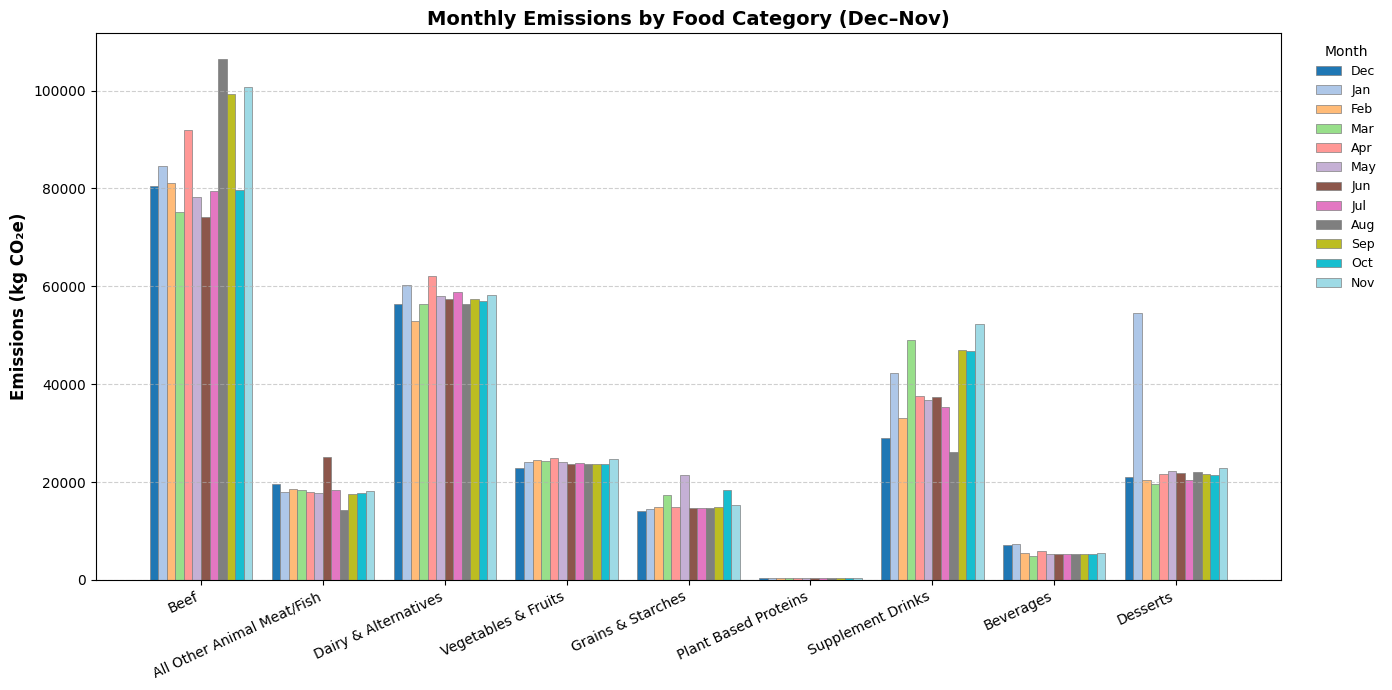

In [361]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assume your dataframe is the same:
# rows = categories, columns = months
df = fig_2.copy()

# --- Setup ---
months = df.columns
categories = df.index
n_months = len(months)
n_cat = len(categories)

# Define positions
x = np.arange(n_cat)
bar_width = 0.07  # smaller bar width for 12 months

# Define a color palette
colors = plt.cm.tab20(np.linspace(0, 1, n_months))

plt.figure(figsize=(14, 7))

# Plot bars for each month, offset horizontally
for i, month in enumerate(months):
    plt.bar(
        x + i * bar_width,
        df[month],
        width=bar_width,
        label=month,
        color=colors[i],
        #alpha=0.85,
        edgecolor='gray',
        linewidth=0.5
    )

# --- Formatting ---
plt.xticks(x + bar_width * (n_months / 2 - 0.5), categories, rotation=25, ha='right')
plt.ylabel("Emissions (kg CO₂e)", fontsize=12, weight='bold')
plt.title("Monthly Emissions by Food Category (Dec–Nov)", fontsize=14, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(
    title="Month",
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    ncol=1,
    frameon=False,
    fontsize=9
)
plt.tight_layout()
plt.show()


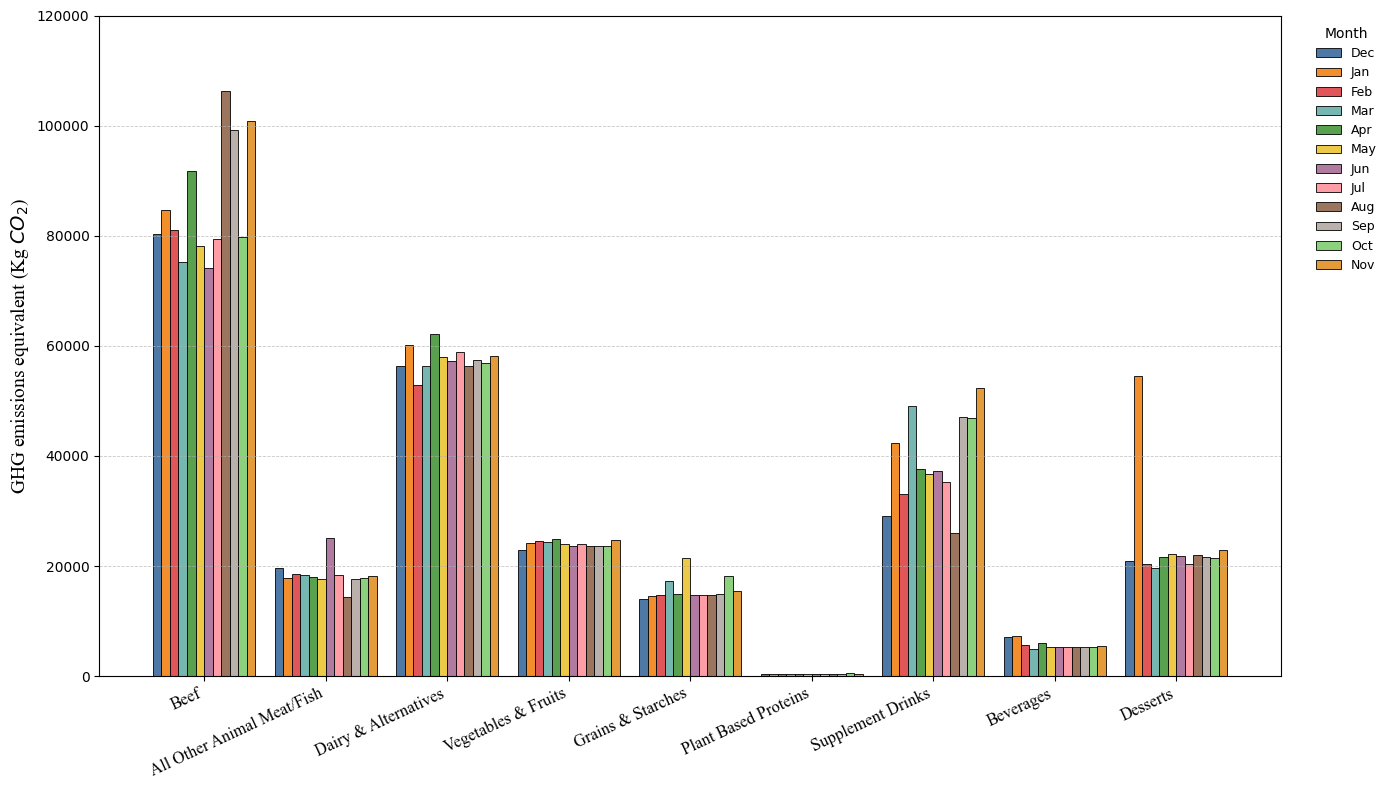

In [399]:
import matplotlib.pyplot as plt
import numpy as np

# === Assume fig_2 has categories as rows and months as columns ===
df = fig_2.copy()
months = df.columns
categories = df.index

n_cat = len(categories)
n_months = len(months)
x = np.arange(n_cat)
bar_width = 0.07

# Use a strong, high-contrast color palette (Tableau 10)
colors = [
    "#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F", "#EDC948",
    "#B07AA1", "#FF9DA7", "#9C755F", "#BAB0AC", "#8CD17D", "#E39C39"
]

plt.figure(figsize=(14, 8))

# === Draw grouped bars ===
for i, month in enumerate(months):
    plt.bar(
        x + i * bar_width,
        df[month],
        width=bar_width,
        label=month,
        color=colors[i % len(colors)],
        edgecolor="black",
        linewidth=0.6
    )

# === Labels, axes, and grid ===
plt.xticks(
    x + bar_width * (n_months / 2 - 0.5),
    categories,
    rotation=25,
    ha="right",
    fontsize=12,
    #fontweight="medium",
    fontname='Times New Roman'
)
plt.ylabel("GHG emissions equivalent (Kg $CO_2$)", fontsize=14, fontname='Times New Roman')
#plt.title(
#    "Monthly Emissions by Food Category (Dec–Nov)",
#    fontsize=14,
#    font ,
#    pad=10
#)
plt.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.7)
plt.tick_params(axis='y', labelsize=10)

# === Clean up borders ===
#for spine in ["top", "right"]:
#    plt.gca().spines[spine].set_visible(False)

# === Legend ===
plt.legend(
    title="Month",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    fontsize=9,
    title_fontsize=10,
    frameon=False,
    ncol=1
)
plt.ylim(top=120000)
plt.tight_layout()

#plt.savefig('fig3.png', dpi=500)
plt.show()

# Fig 4

In [407]:
fig_4 = fig_1.copy()
fig_4['total_gwp_s'] = np.nan

for month in[name[:3] for name in xls_sheet_name]:
    df = globals().get(f"{month.lower()}_summary_s")
    #print(month)
    #print(df.iloc[3, 3])
    fig_4.loc[month,'total_gwp_s'] = df.iloc[3, 3]

fig_4['gwp_per_bed_s'] = fig_4['total_gwp_s'] / fig_4['patient']
fig_4

,patient,total_gwp,gwp_per_bed,total_gwp_s,gwp_per_bed_s
Dec,31371,280552.118141,8.94304,211948.039895,6.756177
Jan,31528,348712.848043,11.060418,276467.242017,8.768943
Feb,30350,284173.642037,9.363217,214969.061466,7.083000
Mar,29327,301420.549161,10.27792,237206.097796,8.088318
Apr,34716,306021.572844,8.815001,227648.516127,6.557452
May,38380,290691.226026,7.574029,223951.150686,5.835100
Jun,35736,289773.896162,8.108739,226525.852254,6.338870
Jul,36005,291497.934422,8.09604,223706.065844,6.213194
Aug,36577,294511.518677,8.051823,203740.071629,5.570169
Sep,36099,305135.481654,8.452741,220438.487227,6.106498


In [412]:
fig_4[['gwp_per_bed','gwp_per_bed_s']]#.to_clipboard()

,gwp_per_bed,gwp_per_bed_s
Dec,8.94304,6.756177
Jan,11.060418,8.768943
Feb,9.363217,7.083000
Mar,10.27792,8.088318
Apr,8.815001,6.557452
May,7.574029,5.835100
Jun,8.108739,6.338870
Jul,8.09604,6.213194
Aug,8.051823,5.570169
Sep,8.452741,6.106498


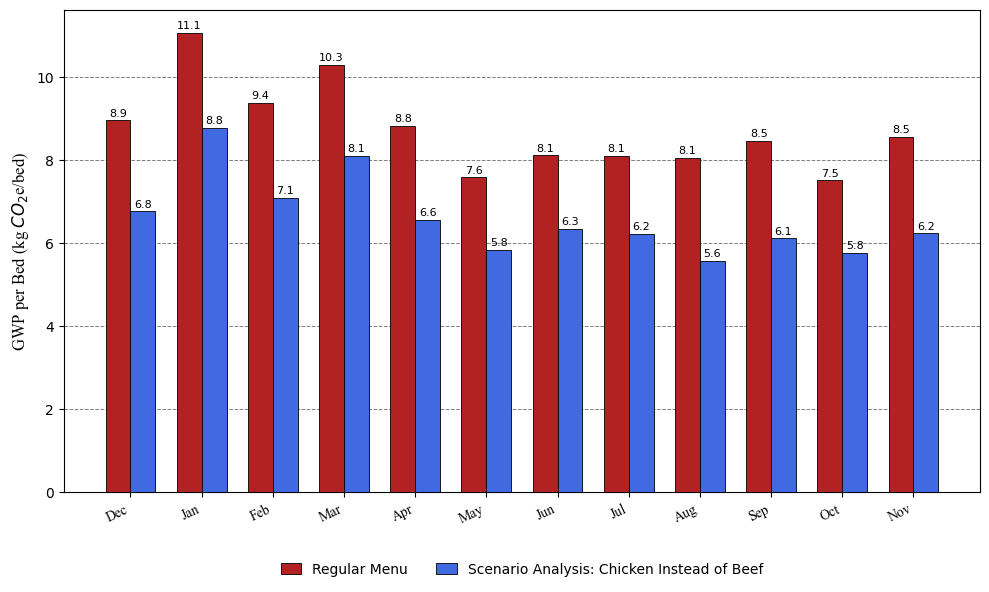

In [711]:
# Assume: fig_4 has months as index, and columns ['gwp_per_bed', 'gwp_per_bed_s']
months = fig_4.index
x = np.arange(len(months))
bar_width = 0.35

plt.figure(figsize=(10, 6))

# === Professional, high-contrast colors ===
# Blue = current (cool, stable)
# Orange = scenario (warm, distinct)
colors = ["firebrick", "royalblue"]  

# === Plot bars ===
bars1 = plt.bar(
    x - bar_width/2, fig_4["gwp_per_bed"],
    width=bar_width, color=colors[0], edgecolor="black", linewidth=0.6,
    label="Regular Menu"
)
bars2 = plt.bar(
    x + bar_width/2, fig_4["gwp_per_bed_s"],
    width=bar_width, color=colors[1], edgecolor="black", linewidth=0.6,
    label="Scenario Analysis: Chicken Instead of Beef"
)

# === Formatting ===
plt.xticks(x, months, rotation=25, ha="right", fontsize=10, fontname='Times New Roman')
plt.ylabel("GWP per Bed (kg $CO_2$e/bed)", fontsize=12, fontname='Times New Roman')
#plt.title("Comparison of GWP per Bed — Current vs. Beef Replacement", fontsize=14,fontname='Times New Roman')

# Grid *behind* bars
plt.grid(axis='y', linestyle='--', alpha=0.5, linewidth=0.7, zorder=0, c='k')
plt.gca().set_axisbelow(True)   # ensures grid is below bars

# Bring bars in front
for bars in [bars1, bars2]:
    for bar in bars:
        bar.set_zorder(3)

# === Add numeric labels ===
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f"{yval:.1f}",
                 ha='center', va='bottom', fontsize=8, zorder=5)

# === Legend and clean style ===
#plt.legend(frameon=False, fontsize=10, loc="upper right")

# === Legend below ===
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.12),   # position below the plot
    ncol=2,                        # two columns
    frameon=False,
    fontsize=10,
    handlelength=1.5,
    handleheight=0.8, 
)

plt.tight_layout()
#plt.savefig('fig4_1.png', dpi=500)
plt.show()

In [415]:
fig_4["reduction_%"] = 100 * (1 - fig_4["gwp_per_bed_s"] / fig_4["gwp_per_bed"])
print(fig_4[["reduction_%"]].mean())


reduction_%    24.460264
dtype: object


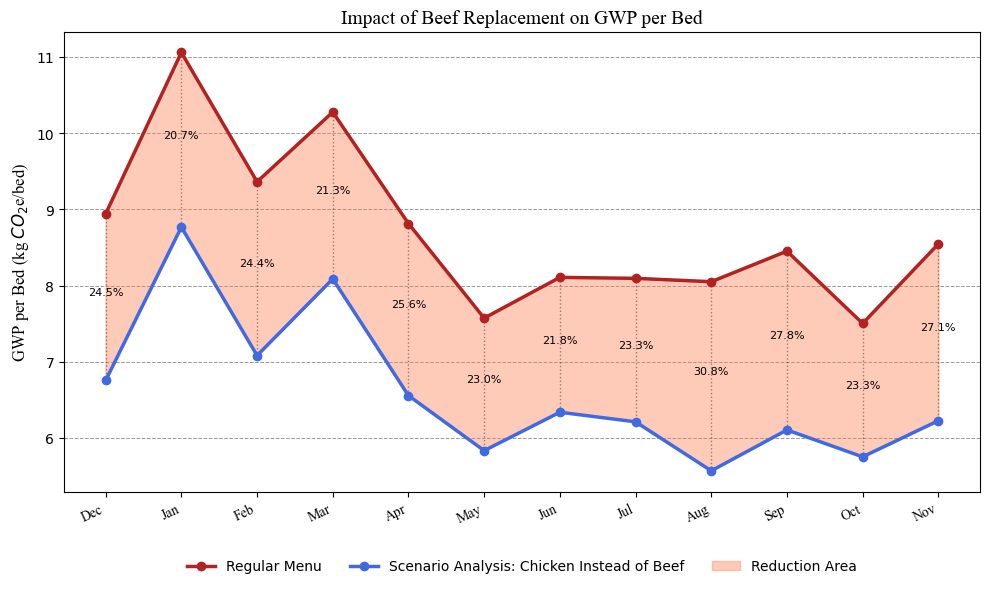

In [701]:
fig_4["gwp_per_bed"] = pd.to_numeric(fig_4["gwp_per_bed"], errors="coerce")
fig_4["gwp_per_bed_s"] = pd.to_numeric(fig_4["gwp_per_bed_s"], errors="coerce")

# Ensure index (months) are treated as strings (for x-axis labels)
fig_4.index = fig_4.index.astype(str)
# === Data ===
months = fig_4.index

plt.figure(figsize=(10,6))

# === Lines ===
plt.plot(
    months, fig_4["gwp_per_bed"], 
    marker="o", color="firebrick", linewidth=2.5, label="Regular Menu"
)
plt.plot(
    months, fig_4["gwp_per_bed_s"], 
    marker="o", color="royalblue", linewidth=2.5, label="Scenario Analysis: Chicken Instead of Beef"
)

# === Fill the gap (reduction area) ===
plt.fill_between(
    months,
    fig_4["gwp_per_bed"],
    fig_4["gwp_per_bed_s"],
    where=(fig_4["gwp_per_bed"] > fig_4["gwp_per_bed_s"]),
    color="coral",
    alpha=0.4,
    interpolate=True,
    label="Reduction Area"
)

# === Styling ===
plt.ylabel("GWP per Bed (kg $CO_2$e/bed)", fontsize=12,fontname='Times New Roman')
plt.title("Impact of Beef Replacement on GWP per Bed", fontsize=14, fontname='Times New Roman')
plt.xticks(rotation=25, ha="right", fontsize=10, fontname='Times New Roman')
plt.yticks(fontsize=10)

# Grid behind lines
plt.grid(linestyle='--', alpha=0.4, linewidth=0.7, zorder=0, c='k', axis='y')
plt.gca().set_axisbelow(True)

# === Legend below ===
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.12),
    ncol=3,
    frameon=False,
    fontsize=10
)

for i, m in enumerate(months):
    pct = 100 * (1 - fig_4["gwp_per_bed_s"].iloc[i] / fig_4["gwp_per_bed"].iloc[i])
    mid = (fig_4["gwp_per_bed"].iloc[i] + fig_4["gwp_per_bed_s"].iloc[i]) / 2
    
    plt.text(m, mid, f"{pct:.1f}%", ha="center", va="bottom", fontsize=8, color="black")

# Add vertical dotted connectors between the two lines
for i, m in enumerate(months):
    plt.plot(
        [m, m],
        [fig_4["gwp_per_bed"].iloc[i], fig_4["gwp_per_bed_s"].iloc[i]],
        color="k",
        linestyle=":",
        linewidth=1,
        zorder=1,
        alpha=0.4
    )


plt.tight_layout()
#plt.savefig('fig5_2.png', dpi=500)
plt.show()

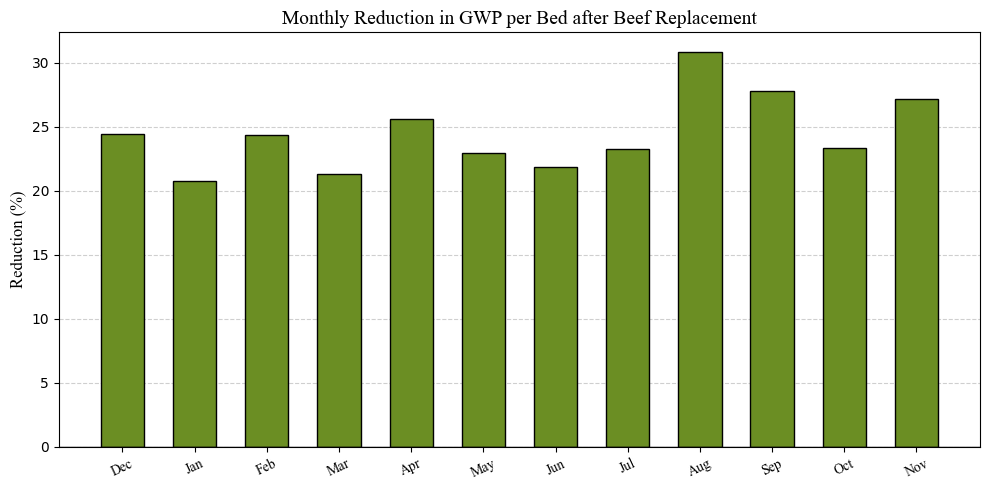

In [520]:


plt.figure(figsize=(10,5))
plt.bar(fig_4.index, fig_4["perc_reduction"], color="olivedrab", edgecolor="black", width=0.6)
plt.axhline(0, color="black", linewidth=1)
plt.ylabel("Reduction (%)", fontsize=12, fontname='Times New Roman')
plt.title("Monthly Reduction in GWP per Bed after Beef Replacement", fontsize=14, fontname='Times New Roman')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.gca().set_axisbelow(True)   # ensures grid is below bars
plt.xticks(rotation=25, ha='center', fontname='Times New Roman')

plt.tight_layout()
#plt.savefig('fig6.png', dpi=500)
plt.show()

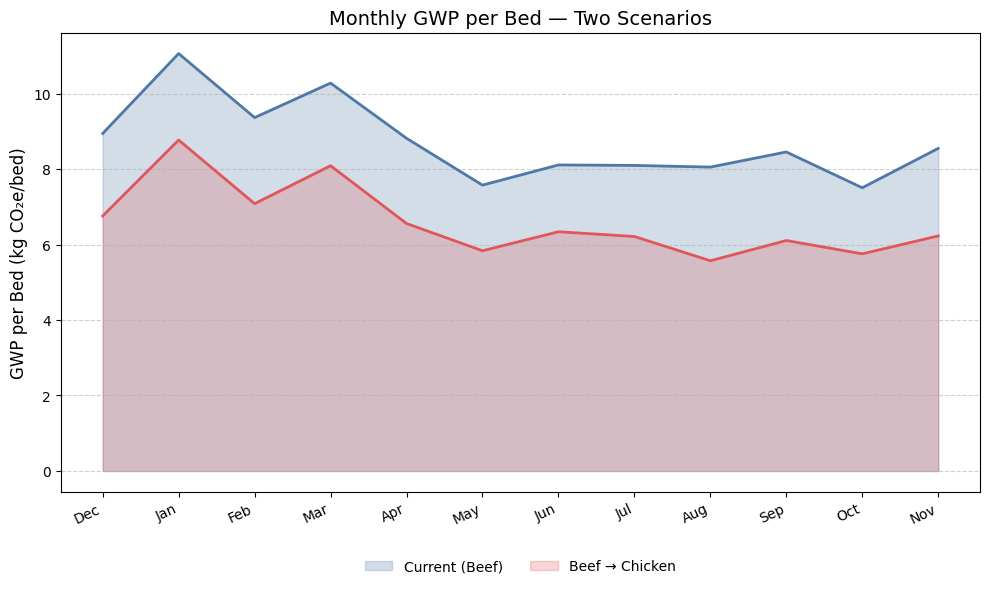

In [612]:
plt.figure(figsize=(10,6))
plt.fill_between(fig_4.index, fig_4["gwp_per_bed"], color="#4E79A7", alpha=0.25, label="Current (Beef)")
plt.fill_between(fig_4.index, fig_4["gwp_per_bed_s"], color="#E15759", alpha=0.25, label="Beef → Chicken")
plt.plot(fig_4.index, fig_4["gwp_per_bed"], color="#4E79A7", linewidth=2)
plt.plot(fig_4.index, fig_4["gwp_per_bed_s"], color="#E15759", linewidth=2)
plt.ylabel("GWP per Bed (kg CO₂e/bed)", fontsize=12,  )
plt.title("Monthly GWP per Bed — Two Scenarios", fontsize=14,  )
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=25, ha='right')
plt.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2)
plt.tight_layout()
plt.show()


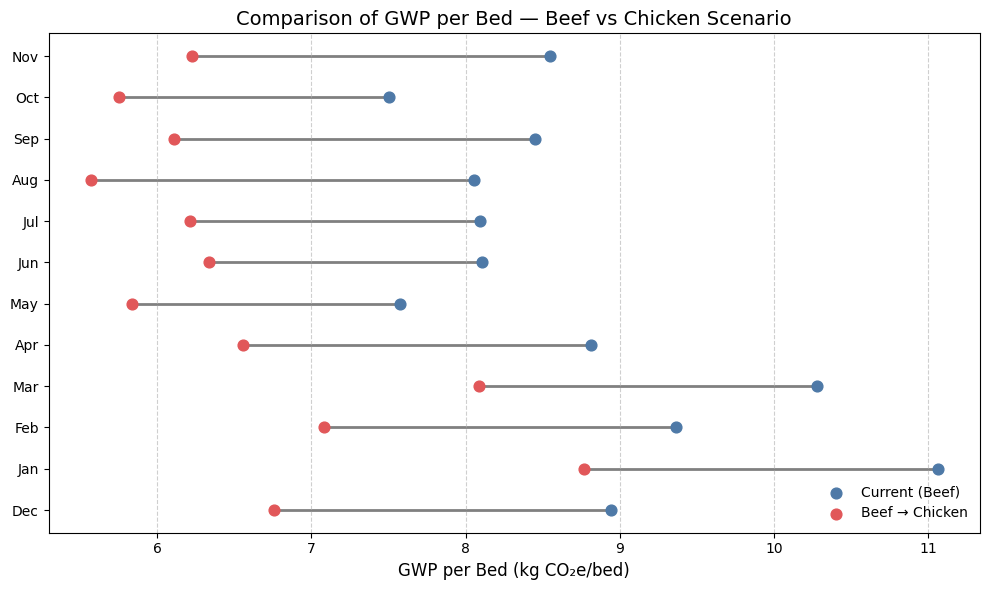

In [613]:
plt.figure(figsize=(10,6))
for i, month in enumerate(fig_4.index):
    plt.plot([fig_4["gwp_per_bed"].iloc[i], fig_4["gwp_per_bed_s"].iloc[i]], [i, i],
             color="gray", linewidth=2, zorder=1)
plt.scatter(fig_4["gwp_per_bed"], np.arange(len(fig_4)), color="#4E79A7", s=60, label="Current (Beef)", zorder=2)
plt.scatter(fig_4["gwp_per_bed_s"], np.arange(len(fig_4)), color="#E15759", s=60, label="Beef → Chicken", zorder=2)
plt.yticks(np.arange(len(fig_4)), fig_4.index)
plt.xlabel("GWP per Bed (kg CO₂e/bed)", fontsize=12,  )
plt.title("Comparison of GWP per Bed — Beef vs Chicken Scenario", fontsize=14,  )
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend(frameon=False, loc='lower right')
plt.tight_layout()
plt.show()


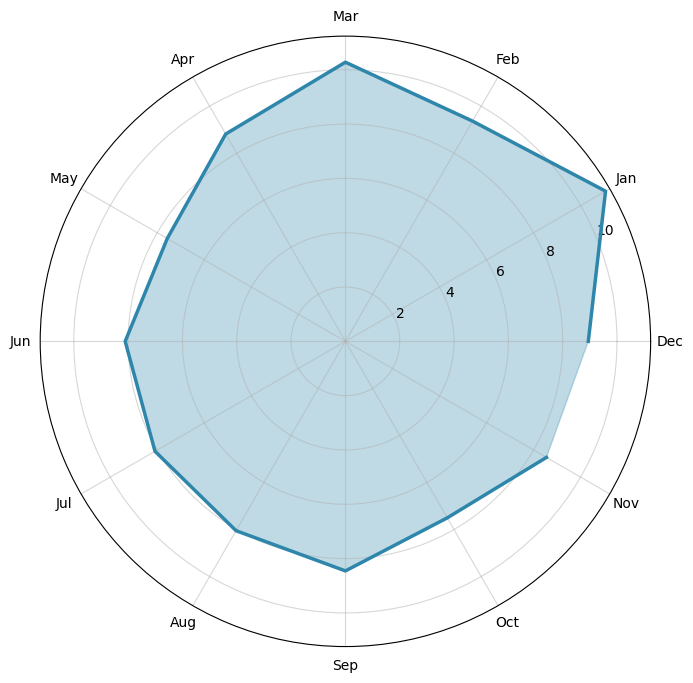

In [528]:
import matplotlib.pyplot as plt
import numpy as np

values = fig_4["gwp_per_bed"].values
months = fig_4.index

# Convert month index to radians
theta = np.linspace(0, 2*np.pi, len(values), endpoint=False)

fig = plt.figure(figsize=(7,7))
ax = plt.subplot(111, polar=True)
ax.plot(theta, values, color="#2E86AB", linewidth=2.5)
ax.fill(theta, values, color="#2E86AB", alpha=0.3)

ax.set_xticks(theta)
ax.set_xticklabels(months)
#ax.set_title("Seasonality of GWP per Bed", fontsize=14,  )
ax.grid(alpha=0.5)
plt.tight_layout()
plt.show()


In [537]:
fig_4

,patient,total_gwp,gwp_per_bed,total_gwp_s,gwp_per_bed_s,reduction_%,perc_reduction,diff
Dec,31371,280552.118141,8.943040,211948.039895,6.756177,24.453238,24.453238,2.186863
Jan,31528,348712.848043,11.060418,276467.242017,8.768943,20.717793,20.717793,2.291474
Feb,30350,284173.642037,9.363217,214969.061466,7.083000,24.35292,24.352920,2.280217
Mar,29327,301420.549161,10.277920,237206.097796,8.088318,21.303939,21.303939,2.189602
Apr,34716,306021.572844,8.815001,227648.516127,6.557452,25.610305,25.610305,2.257549
May,38380,290691.226026,7.574029,223951.150686,5.835100,22.959095,22.959095,1.738928
Jun,35736,289773.896162,8.108739,226525.852254,6.338870,21.826688,21.826688,1.769869
Jul,36005,291497.934422,8.096040,223706.065844,6.213194,23.25638,23.256380,1.882846
Aug,36577,294511.518677,8.051823,203740.071629,5.570169,30.821018,30.821018,2.481654
Sep,36099,305135.481654,8.452741,220438.487227,6.106498,27.757177,27.757177,2.346242


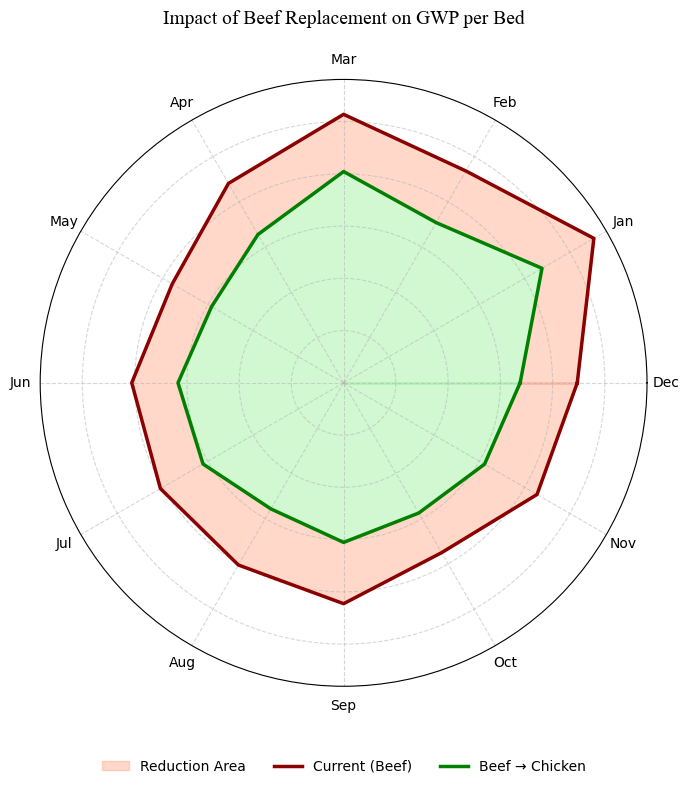

In [684]:
import matplotlib.pyplot as plt
import numpy as np

# === Prepare data ===
values1 = fig_4["gwp_per_bed"].values     # current (beef)
values2 = fig_4["gwp_per_bed_s"].values   # scenario (beef→chicken)
months = fig_4.index

# Convert months to radians
theta = np.linspace(0, 2 * np.pi, len(values1), endpoint=False)

# Close the loop
values1 = np.append(values1, values1[0])
values2 = np.append(values2, values2[0])
theta = np.append(theta, theta[0])

# === Colors (high contrast, color-blind safe) ===
color_current = "darkred"    # strong blue
color_scenario = "green"   # orange
fill_color = "coral"       # soft yellow for difference

# === Plot ===
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)

# Fill reduction area (between lines)
ax.fill_between(theta, values1, values2,
                where=(values1 > values2),
                color=fill_color, alpha=0.3, zorder=1, label="Reduction Area")

# 🟩 Fill from center to green line (Beef → Chicken)
ax.fill_between(theta, 0, values2,
                color="lightgreen", alpha=0.4, zorder=0)

# Plot both lines
ax.plot(theta, values1, color=color_current, linewidth=2.5, label="Current (Beef)")
ax.plot(theta, values2, color=color_scenario, linewidth=2.5, label="Beef → Chicken")

# Style & grid
ax.set_xticks(theta[:-1])
ax.set_xticklabels(months, fontsize=10)
ax.set_yticklabels([])   # hide radial labels for cleaner look
ax.grid(alpha=0.5, linestyle="--")

ax.set_title("Impact of Beef Replacement on GWP per Bed\n", fontsize=14, pad=25, fontname='Times New Roman')

# Legend below
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=3,
    frameon=False,
    fontsize=10
)

plt.tight_layout()
#plt.savefig('fig7.png', dpi=500)
plt.show()


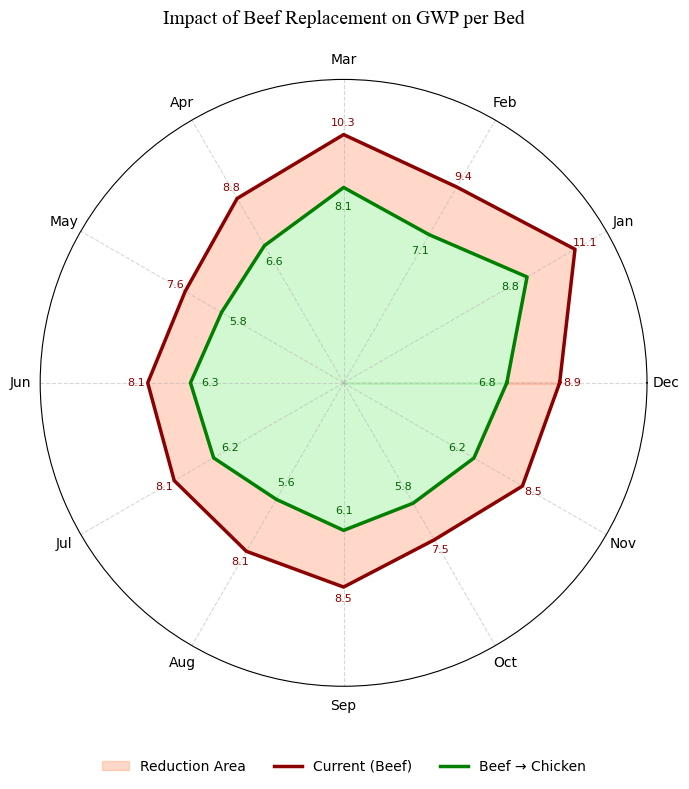

In [685]:
import matplotlib.pyplot as plt
import numpy as np

# === Prepare data ===
values1 = fig_4["gwp_per_bed"].values     # current (beef)
values2 = fig_4["gwp_per_bed_s"].values   # scenario (beef→chicken)
months = fig_4.index

# Convert months to radians
theta = np.linspace(0, 2 * np.pi, len(values1), endpoint=False)

# Close the loop
values1 = np.append(values1, values1[0])
values2 = np.append(values2, values2[0])
theta = np.append(theta, theta[0])

# === Colors ===
color_current = "darkred"
color_scenario = "green"
fill_color = "coral"

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)

# Fill from center to scenario (green) line
ax.fill_between(theta, 0, values2, color="lightgreen", alpha=0.4, zorder=0)

# Fill reduction area between the two lines
ax.fill_between(theta, values1, values2,
                where=(values1 > values2),
                color=fill_color, alpha=0.3, zorder=1, label="Reduction Area")

# Plot both lines
ax.plot(theta, values1, color=color_current, linewidth=2.5, label="Current (Beef)")
ax.plot(theta, values2, color=color_scenario, linewidth=2.5, label="Beef → Chicken")

# === Add radial scale labels ===
max_val = max(values1)
radial_ticks = np.arange(5, round(max_val + 1), 2)  # adjust spacing as needed
#ax.set_yticks(radial_ticks)
#ax.set_yticklabels([f"{v:.1f}" for v in radial_ticks], fontsize=9, color="gray")
ax.set_yticks([])        # remove radial tick marks
ax.set_yticklabels([])   # remove radial tick labels
ax.set_ylim(0, max_val + 1.5)

# === Add numeric values near data points ===
for t, v1, v2, m in zip(theta[:-1], values1[:-1], values2[:-1], months):
    # show beef value outside the line
    ax.text(t, v1 + 0.5, f"{v1:.1f}", color="darkred", fontsize=8,
            ha="center", va="center", #rotation=np.degrees(t), 
            rotation_mode='anchor')
    # show chicken value inside the green line
    ax.text(t, v2 - 0.8, f"{v2:.1f}", color="darkgreen", fontsize=8,
            ha="center", va="center", #rotation=np.degrees(t), 
            rotation_mode='anchor'
           )

# Axis labels (months)
ax.set_xticks(theta[:-1])
ax.set_xticklabels(months, fontsize=10)

# Style
ax.grid(alpha=0.5, linestyle="--")
ax.set_title("Impact of Beef Replacement on GWP per Bed\n", fontsize=14, pad=25, fontname='Times New Roman')

# === Add average values as annotation ===
avg_current = np.mean(fig_4["gwp_per_bed"])
avg_scenario = np.mean(fig_4["gwp_per_bed_s"])
reduction_pct = 100 * (1 - avg_scenario / avg_current)
#ax.text(0, 0, f"Avg Reduction:\n{reduction_pct:.1f}%", ha="center", va="center", fontsize=10, color="black", fontname='Times New Roman')

# Legend below
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=3,
    frameon=False,
    fontsize=10
)

plt.tight_layout()
#plt.savefig('fig7.png', dpi=500)
plt.show()


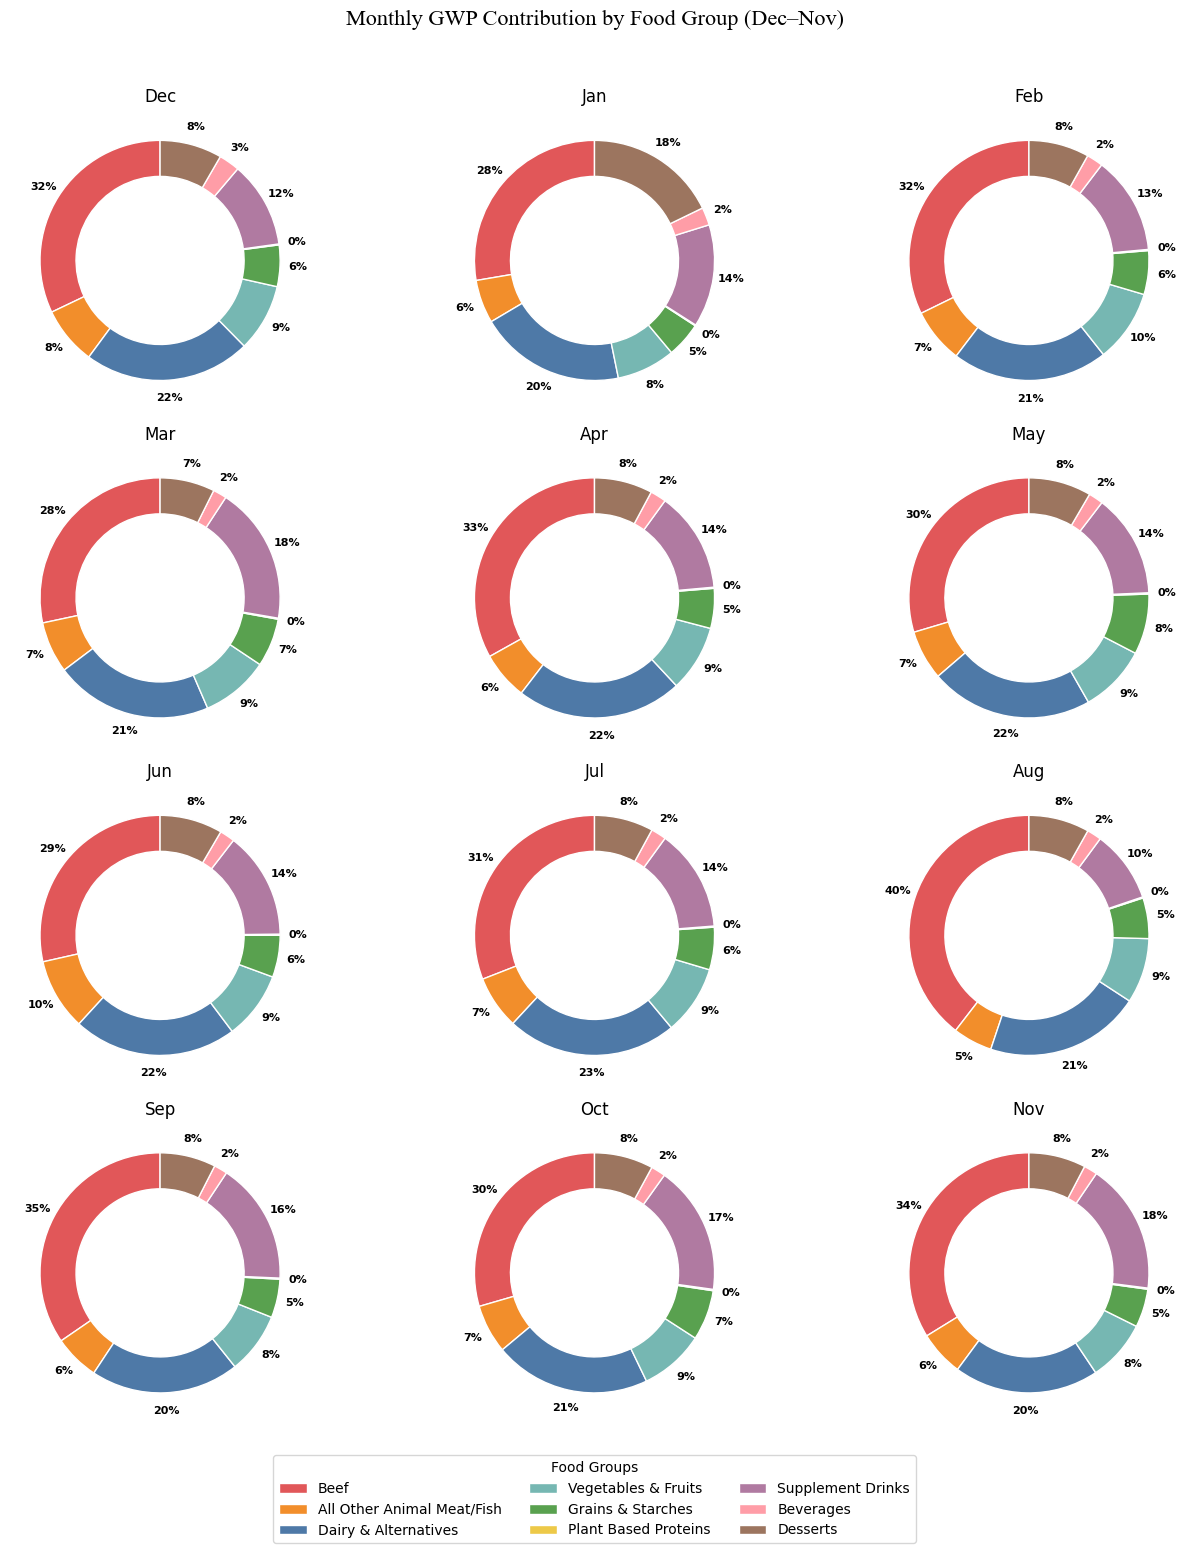

In [686]:
months = fig_2.columns
labels = fig_2.index
colors = [
    "#E15759", "#F28E2B", "#4E79A7", "#76B7B2", "#59A14F",
    "#EDC948", "#B07AA1", "#FF9DA7", "#9C755F"
]

fig, axes = plt.subplots(4, 3, figsize=(14, 14))
axes = axes.flatten()

for i, month in enumerate(months):
    ax = axes[i]
    values = fig_2[month]

    wedges, texts, autotexts = ax.pie(
        values,
        labels=None,
        colors=colors,
        startangle=90,
        wedgeprops=dict(width=0.3, edgecolor='white'),
        autopct='%1.0f%%',
        pctdistance=1.15
    )

    # Style percentage labels
    for autotext in autotexts:
        autotext.set_fontsize(8)
        autotext.set_color('black')
        autotext.set_weight('bold')

    ax.set_title(month, fontsize=12,)

# Remove any empty axes if fewer than 12
for j in range(len(months), len(axes)):
    fig.delaxes(axes[j])

# Shared legend
fig.legend(
    labels,
    title="Food Groups",
    loc="lower center",
    ncol=3,
    bbox_to_anchor=(0.5, -0.08),
    fontsize=10
)

fig.suptitle("Monthly GWP Contribution by Food Group (Dec–Nov)", fontsize=16, y=1.02, fontname='Times New Roman')
plt.tight_layout()
#plt.savefig('fig8-original.png', dpi=500)
plt.show()


In [572]:
fig_2_s = pd.DataFrame(columns=[name[:3] for name in xls_sheet_name],
                   index=['Beef', 'All Other Animal Meat/Fish', 
                          'Dairy & Alternatives',
                          'Vegetables & Fruits',
                          'Grains & Starches',
                          'Plant Based Proteins',
                          'Supplement Drinks',
                          'Beverages',
                          'Desserts'])

for month in[name[:3] for name in xls_sheet_name]:
    df = globals().get(f"{month.lower()}_table1")
    
    df2 = globals().get(f"{month.lower()}_animal_s")
    fig_2_s.loc['Beef', month] = df2[df2['food_items'].isin(beef)]['gwp_x_kg'].sum()
    
    fig_2_s.loc['All Other Animal Meat/Fish', month] = df[df['food_items'].isin(all_other_animal)]['gwp_x_kg'].sum()
    fig_2_s.loc['Dairy & Alternatives', month] = df[df['food_items'].isin(dairy)]['gwp_x_kg'].sum()
    fig_2_s.loc['Vegetables & Fruits', month] = df[df['food_items'].isin(vegetables)]['gwp_x_kg'].sum()
    fig_2_s.loc['Grains & Starches', month] = df[df['food_items'].isin(grains)]['gwp_x_kg'].sum()
    fig_2_s.loc['Plant Based Proteins', month] = df[df['food_items'].isin(plant_protein)]['gwp_x_kg'].sum()
    fig_2_s.loc['Supplement Drinks', month] = df[df['food_items'].isin(supp_drinks)]['gwp_x_kg'].sum()
    fig_2_s.loc['Beverages', month] = df[df['food_items'].isin(beverages)]['gwp_x_kg'].sum()
    fig_2_s.loc['Desserts', month] = df[df['food_items'].isin(desserts)]['gwp_x_kg'].sum()

fig_2_s

,Dec,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov
Beef,11784.427655,12409.949079,11887.57861,11030.401922,13462.488537,11464.239585,10864.397814,11644.910788,15592.21519,14548.779445,11690.723027,14776.796488
All Other Animal Meat/Fish,19568.400978,17887.749488,18587.171684,18364.760594,17915.860577,17705.367971,25080.817221,18418.359405,14294.101264,17567.203593,17755.836409,18128.368707
Dairy & Alternatives,56331.135399,60181.438215,52825.793721,56308.43909,62080.504124,57911.229862,57295.996941,58927.472364,56349.095217,57467.849181,56914.736674,58202.895917
Vegetables & Fruits,22860.080682,24143.049895,24536.931078,24301.482214,24855.06038,24072.336579,23679.870151,23934.108227,23579.566732,23661.924833,23597.972807,24667.498463
Grains & Starches,13994.522801,14562.885925,14806.493039,17283.349754,14883.036084,21486.937352,14667.017268,14684.315441,14734.996609,14900.976482,18266.95683,15390.024769
Plant Based Proteins,323.237585,355.42473,401.652138,381.465588,432.801021,452.872339,386.407438,384.337009,389.522543,422.088502,483.335801,461.633059
Supplement Drinks,29081.96131,42324.55588,33129.69931,49075.81662,37663.76086,36740.60244,37310.53332,35316.75119,26069.79664,46979.2966,46815.65383,52295.99773
Beverages,7081.479703,7334.354806,5570.744764,4887.947193,5991.948486,5208.874838,5272.534479,5291.603562,5246.362083,5197.811035,5285.85189,5430.64492
Desserts,20682.987442,54193.204729,20219.389066,19305.515915,21460.969618,22013.592401,21669.356978,20146.229965,21736.429429,21319.753343,21176.714132,22645.656293


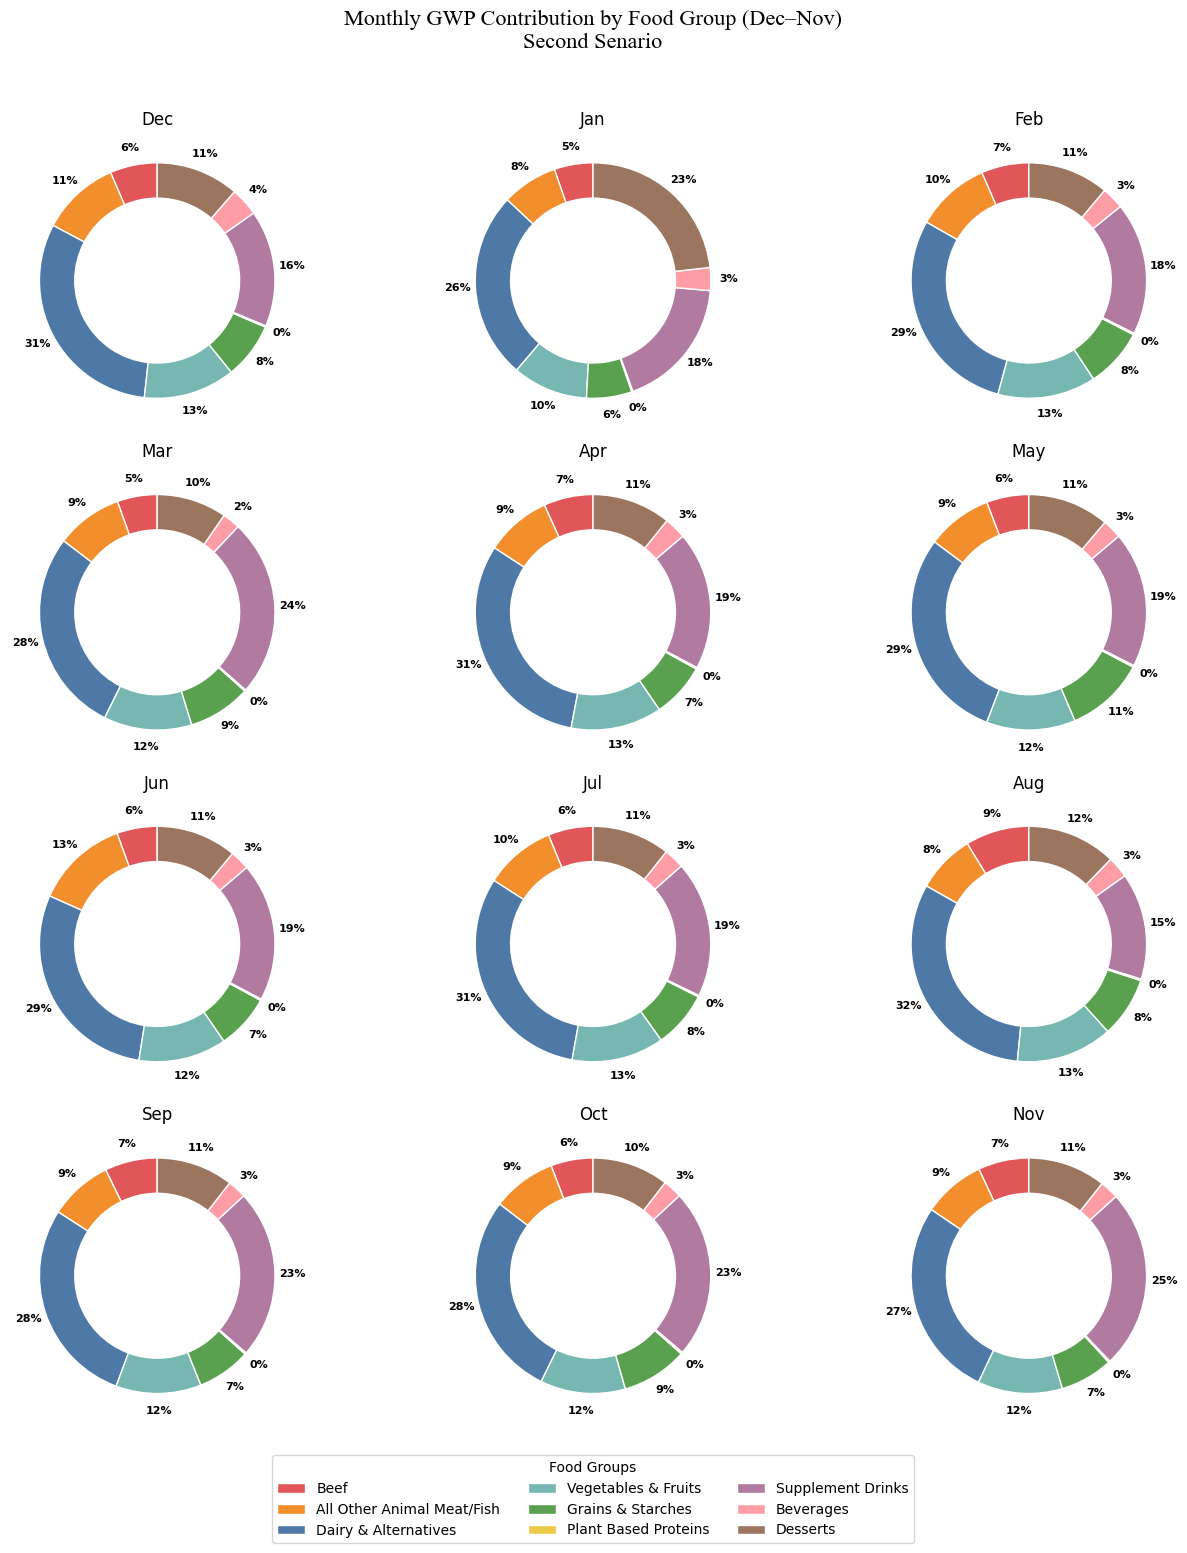

In [687]:
months = fig_2_s.columns
labels = fig_2_s.index
colors = [
    "#E15759", "#F28E2B", "#4E79A7", "#76B7B2", "#59A14F",
    "#EDC948", "#B07AA1", "#FF9DA7", "#9C755F"
]

fig, axes = plt.subplots(4, 3, figsize=(14, 14))
axes = axes.flatten()

for i, month in enumerate(months):
    ax = axes[i]
    values = fig_2_s[month]

    wedges, texts, autotexts = ax.pie(
        values,
        labels=None,
        colors=colors,
        startangle=90,
        wedgeprops=dict(width=0.3, edgecolor='white'),
        autopct='%1.0f%%',
        pctdistance=1.15
    )

    # Style percentage labels
    for autotext in autotexts:
        autotext.set_fontsize(8)
        autotext.set_color('black')
        autotext.set_weight('bold')

    ax.set_title(month, fontsize=12,)

# Remove any empty axes if fewer than 12
for j in range(len(months), len(axes)):
    fig.delaxes(axes[j])

# Shared legend
fig.legend(
    labels,
    title="Food Groups",
    loc="lower center",
    ncol=3,
    bbox_to_anchor=(0.5, -0.08),
    fontsize=10
)

fig.suptitle("Monthly GWP Contribution by Food Group (Dec–Nov)\nSecond Senario", fontsize=16, y=1.02, fontname='Times New Roman')
plt.tight_layout()
#plt.savefig('fig8-second.png', dpi=500)
plt.show()


In [676]:
import pandas as pd

# === List of months ===
months = ["Dec","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov"]

# === Initialize storage ===
data = []

# === Loop through months ===
for month in months:
    # Dynamically get the three dataframes for each month
    df_summary = globals()[f"{month.lower()}_summary"]
    df_animal = globals()[f"{month.lower()}_animal"]
    df_animal_s = globals()[f"{month.lower()}_animal_s"]
    
    # --- Extract values ---
    total_gwp = df_summary.loc[df_summary['variables']=='Total','gwp_total'].iloc[0]
    meat_gwp = df_animal.loc[df_animal['food_items']=='A_beef_consumed_ON','gwp_x_kg'].iloc[0]
    chicken_gwp = df_animal_s.loc[df_animal_s['food_items']=='A_beef_consumed_ON','gwp_x_kg'].iloc[0]
    
    # --- Append to list ---
    data.append({
        "Month": month,
        "Total_GWP": total_gwp,
        "Beef_GWP": meat_gwp,
        "Chicken_GWP": chicken_gwp
    })

# === Create dataframe with all results ===
summary_df = pd.DataFrame(data)

# === Calculate components for visualization ===
summary_df["Other_GWP"] = summary_df["Total_GWP"] - summary_df["Beef_GWP"]
summary_df["Reduction"] = summary_df["Beef_GWP"] - summary_df["Chicken_GWP"]
summary_df["Scenario_Total"] = summary_df["Other_GWP"] + summary_df["Chicken_GWP"]

# Preview
#print(summary_df)


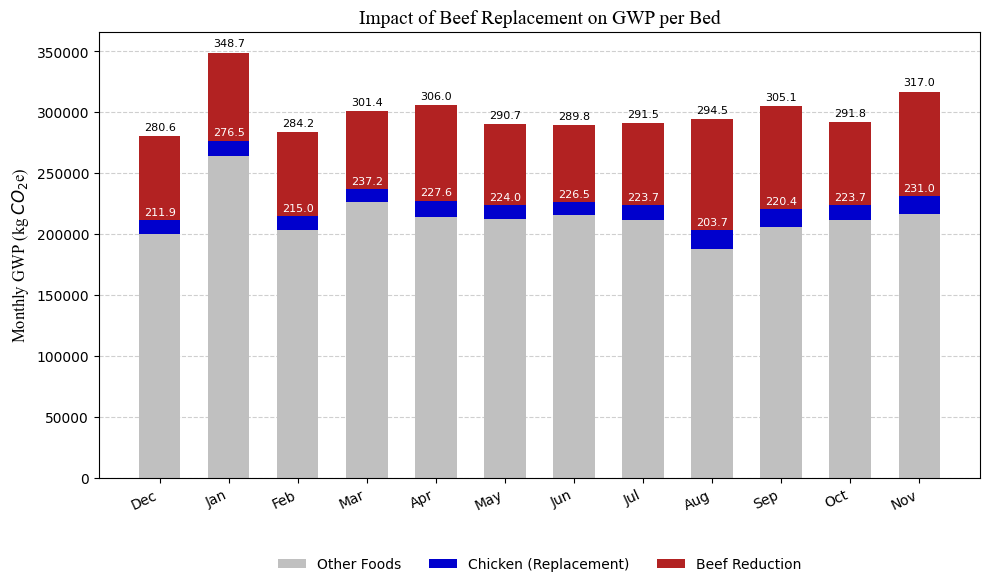

In [688]:
import matplotlib.pyplot as plt
import numpy as np

# === Extract data ===
months = summary_df["Month"]
other = summary_df["Other_GWP"]
chicken = summary_df["Chicken_GWP"]
reduction = summary_df["Reduction"]

# === Colors ===
color_other = "silver"    # neutral gray for other foods
color_chicken = "mediumblue"  # green for chicken (replacement)
color_reduction = "firebrick"  # red for reduction area

# === Plot ===
plt.figure(figsize=(10,6))
x = np.arange(len(months))
bar_width = 0.6

# Base layers
plt.bar(x, other, width=bar_width, color=color_other, label="Other Foods")

# Chicken layer (stacked on top)
plt.bar(x, chicken, bottom=other, width=bar_width, color=color_chicken, label="Chicken (Replacement)")

# Reduction layer (stacked on top of total scenario)
plt.bar(x, reduction, bottom=other+chicken, width=bar_width, color=color_reduction, label="Beef Reduction")

# === Labels and style ===
plt.xticks(x, months, rotation=25, ha="right", fontsize=10)
plt.ylabel("Monthly GWP (kg $CO_2$e)", fontsize=12, fontname='Times New Roman' )
plt.title("Impact of Beef Replacement on GWP per Bed", fontsize=14, fontname='Times New Roman' )

plt.grid(axis='y', linestyle='--', alpha=0.6, zorder=0)
plt.gca().set_axisbelow(True)

# Add values on top of red section (total before)
for i, total in enumerate(summary_df["Total_GWP"]):
    plt.text(x[i], total + total * 0.01, f"{total/1000:.1f}", ha="center", va="bottom", fontsize=8)

for i, total in enumerate(summary_df["Scenario_Total"]):
    plt.text(x[i], total + total * 0.01, f"{total/1000:.1f}", ha="center", va="bottom", fontsize=8, c='w')


# Legend below
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=3,
    frameon=False,
    fontsize=10
)


plt.tight_layout()
#plt.savefig('fig9.png', dpi=500)
plt.show()

# top 20

In [ ]:
top20 = [
    "A_beef_consumed_ON",
    "A_milk_consumed_ON",
    "Supp_EnsureChocolate_Water_WheyProtein_Sugar",
    "PuddingCup_Proxy_Milk_Eggs_Sugar_Consumed",
    "Supp_BoostDrink_Water_Sugar_WheyProtein_Poore&Nemecek",
    "S_icecream_consumed_ON",
    "Supp_EnsureVanillaStrawberry_Water_SoyProtein_Milk",
    "A_cheese_consumed_ON",
    "A_egg_consumed_ON",
    "A_chicken_consumed_ON",
    "V_tomato_unheated_greenhouse_consumed_ON",
    "A_yogurt_consumed_ON",
    "F_banana_consumed_ON",
    "Turkey_Proxy_Chicken_Consumed",
    "G_bread_consumed_ON",
    "MagicCup_Proxy_Icecream ",
    "Muffin_Proxy_Bread_Sugar",
    "Sorbet_Water_Sugar_Orange",
    "A_pork_consumed_ON",
    "Supp_Glucerna_Water_Milk_SoyProtein"
]



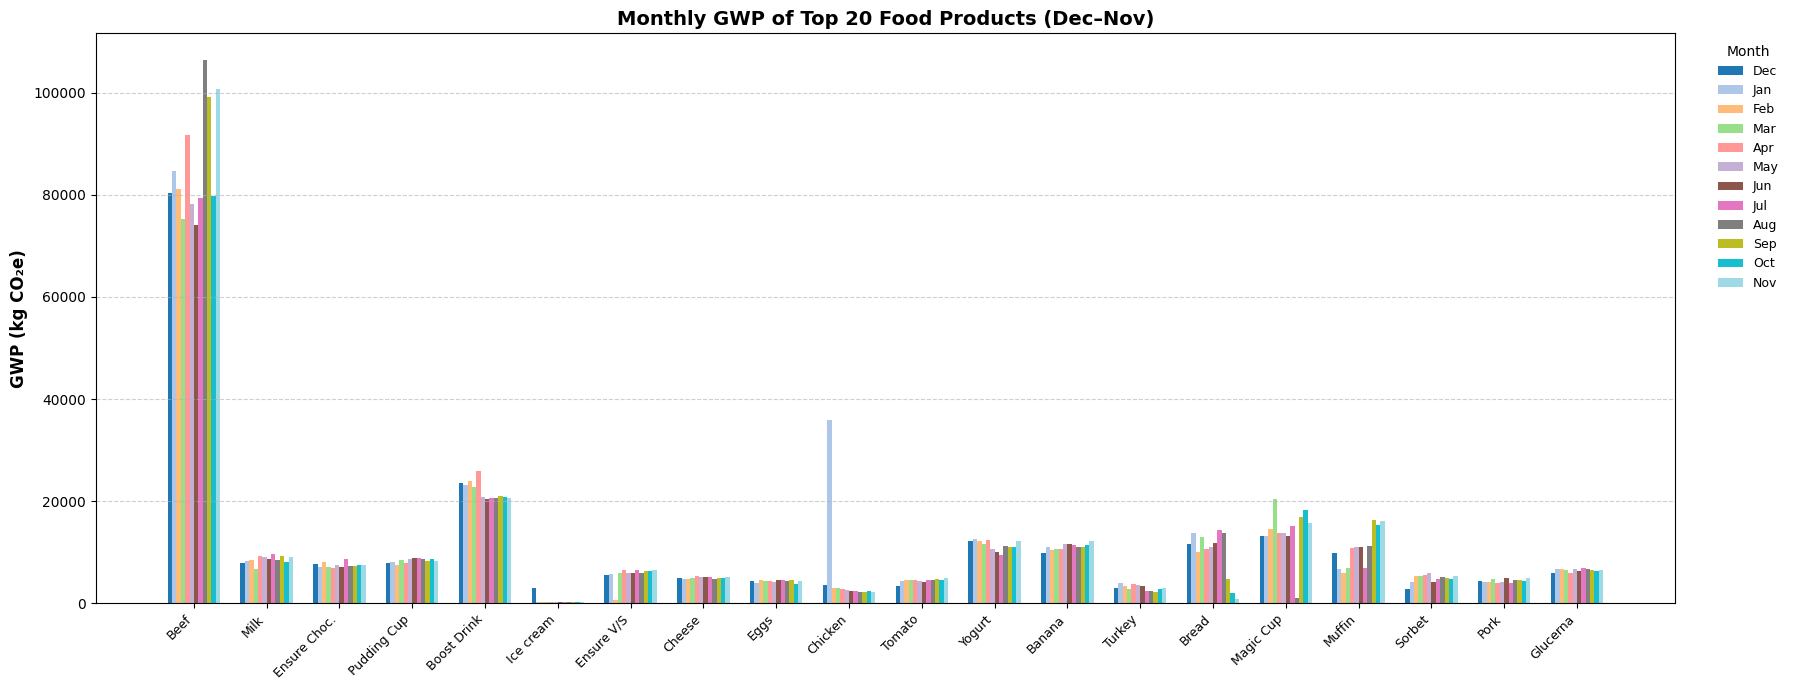

In [722]:
# === List of months ===
months = ["Dec","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov"]

# === Top 20 ON-model product names ===
top20 = [
    "A_beef_consumed_ON",
    "A_milk_consumed_ON",
    "Supp_EnsureChocolate_Water_WheyProtein_Sugar",
    "PuddingCup_Proxy_Milk_Eggs_Sugar_Consumed",
    "Supp_BoostDrink_Water_Sugar_WheyProtein_Poore&Nemecek",
    "S_icecream_consumed_ON",
    "Supp_EnsureVanillaStrawberry_Water_SoyProtein_Milk",
    "A_cheese_consumed_ON",
    "A_egg_consumed_ON",
    "A_chicken_consumed_ON",
    "V_tomato_unheated_greenhouse_consumed_ON",
    "A_yogurt_consumed_ON",
    "F_banana_consumed_ON",
    "Turkey_Proxy_Chicken_Consumed",
    "G_bread_consumed_ON",
    "MagicCup_Proxy_Icecream ",
    "Muffin_Proxy_Bread_Sugar",
    "Sorbet_Water_Sugar_Orange",
    "A_pork_consumed_ON",
    "Supp_Glucerna_Water_Milk_SoyProtein"
]

# === 1️⃣ Collect data from all month table1s ===
records = []

for month in months:
    df = globals()[f"{month.lower()}_table1"]  # e.g., dec_table1, jan_table1
    for prod in top20:
        if prod in df["food_items"].values:
            val = df.loc[df["food_items"] == prod, "gwp_x_kg"].values[0]
        else:
            val = np.nan
        records.append({"Month": month, "Food_Item": prod, "GWP": val})

df_top = pd.DataFrame(records)

# Pivot: rows = Food_Item, columns = Month

df_pivot = (
    df_top.pivot(index="Food_Item", columns="Month", values="GWP")
    .reindex(columns=["Dec","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov"])
    .fillna(0)
)


# === Optional: short x-axis labels for readability ===
short_labels = [
    "Beef","Milk","Ensure Choc.","Pudding Cup","Boost Drink","Ice cream",
    "Ensure V/S","Cheese","Eggs","Chicken","Tomato","Yogurt","Banana",
    "Turkey","Bread","Magic Cup","Muffin","Sorbet","Pork","Glucerna"
]

# === 2️⃣ Plot grouped bar chart ===
x = np.arange(len(top20))
bar_width = 0.06
months = df_pivot.columns
colors = plt.cm.tab20(np.linspace(0, 1, len(months)))

plt.figure(figsize=(18,7))

for i, month in enumerate(months):
    plt.bar(
        x + i * bar_width,
        df_pivot[month],
        width=bar_width,
        color=colors[i],
        label=month
    )

# === 3️⃣ Styling ===
plt.xticks(x + bar_width * (len(months)/2 - 0.5), short_labels, rotation=45, ha="right", fontsize=9)
plt.ylabel("GWP (kg CO₂e)", fontsize=12, weight="bold")
plt.title("Monthly GWP of Top 20 Food Products (Dec–Nov)", fontsize=14, weight="bold")

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title="Month", bbox_to_anchor=(1.02,1), loc='upper left', frameon=False, fontsize=9)
plt.tight_layout()
plt.show()


In [727]:
df_pivot#.to_clipboard()

Month,Dec,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov
Food_Item,,,,,,,,,,,,
A_beef_consumed_ON,80388.505901,84655.555105,81092.159182,75244.853287,91835.545254,78204.314925,74112.441721,79436.779365,106363.662238,99245.773873,79749.291569,100801.212108
A_milk_consumed_ON,23535.515643,23053.098239,23869.562726,22787.334174,25858.481600,20888.595998,20417.821677,20687.222459,20644.424403,20897.786661,20829.662696,20560.590766
Supp_EnsureChocolate_Water_WheyProtein_Sugar,13106.645300,13152.632150,14484.016030,20495.232890,13668.145300,13705.934250,13231.623970,15203.668120,991.283330,16948.753970,18340.364340,15689.904660
PuddingCup_Proxy_Milk_Eggs_Sugar_Consumed,12252.052600,12581.609280,12159.676800,11608.992120,12345.517160,10618.701600,9921.566040,9414.533040,11224.254720,11075.043960,10980.195240,12196.162920
Supp_BoostDrink_Water_Sugar_WheyProtein_Poore&Nemecek,11596.199070,13762.668210,9943.401360,13030.752960,10606.117350,11018.651400,11806.458360,14252.386050,13720.084050,4649.657970,1937.579280,771.837900
S_icecream_consumed_ON,9843.182587,10993.897100,10450.159084,10638.180641,10574.377530,11543.846038,11584.499348,11386.879093,10959.454713,11050.924660,11413.416670,12179.618630
Supp_EnsureVanillaStrawberry_Water_SoyProtein_Milk,9835.889440,6780.849280,5857.061100,6917.759550,10741.565230,10990.553220,10936.783280,6800.013860,11110.173800,16271.702670,15380.346190,16097.753580
A_cheese_consumed_ON,7878.497527,8236.573592,8399.469079,6609.623315,9325.685891,9065.690127,8710.877095,9623.323464,8377.223660,9228.312766,8032.333366,9031.122027
A_egg_consumed_ON,7788.762256,8113.610859,7418.149226,8430.113366,7913.049536,8618.248280,8903.337010,8829.803267,8564.462328,8299.172394,8552.430040,8307.541673


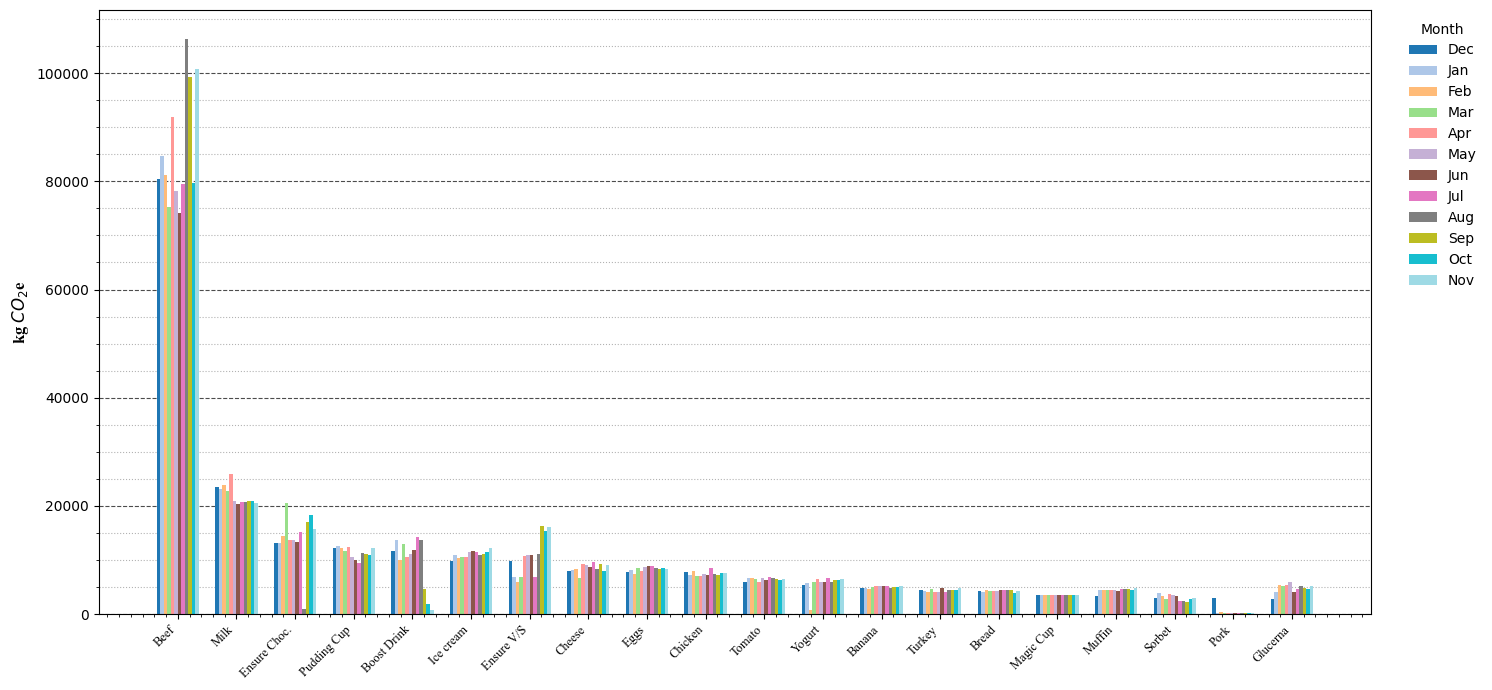

In [764]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ordered months
month_order = ["Dec","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov"]

# Exact ON model names (as you gave)
top20 = [
    "A_beef_consumed_ON",
    "A_milk_consumed_ON",
    "Supp_EnsureChocolate_Water_WheyProtein_Sugar",
    "PuddingCup_Proxy_Milk_Eggs_Sugar_Consumed",
    "Supp_BoostDrink_Water_Sugar_WheyProtein_Poore&Nemecek",
    "S_icecream_consumed_ON",
    "Supp_EnsureVanillaStrawberry_Water_SoyProtein_Milk",
    "A_cheese_consumed_ON",
    "A_egg_consumed_ON",
    "A_chicken_consumed_ON",
    "V_tomato_unheated_greenhouse_consumed_ON",
    "A_yogurt_consumed_ON",
    "F_banana_consumed_ON",
    "Turkey_Proxy_Chicken_Consumed",
    "G_bread_consumed_ON",
    "MagicCup_Proxy_Icecream ",  # ⚠️ trailing space in source
    "Muffin_Proxy_Bread_Sugar",
    "Sorbet_Water_Sugar_Orange",
    "A_pork_consumed_ON",
    "Supp_Glucerna_Water_Milk_SoyProtein"
]

# Helper to clean/aggregate a month table1
def clean_table1(df):
    df = df.copy()
    # normalize column names just in case
    df.columns = [str(c).strip() for c in df.columns]
    # standardize food_items values (strip spaces)
    df["food_items"] = df["food_items"].astype(str).str.strip()
    # ensure numeric
    df["gwp_x_kg"] = pd.to_numeric(df["gwp_x_kg"], errors="coerce")
    # aggregate duplicates by food_items
    df = df.groupby("food_items", as_index=False, dropna=False)["gwp_x_kg"].sum()
    return df

# Collect tidy records across months
records = []
for m in month_order:
    df = globals()[f"{m.lower()}_table1"]
    df = clean_table1(df)
    # pull values for each top20 item; 0 if absent
    for prod in top20:
        val = df.loc[df["food_items"] == prod.strip(), "gwp_x_kg"]
        gwp = float(val.iloc[0]) if len(val) else 0.0
        records.append({"Food_Item": prod, "Month": m, "GWP": gwp})

tidy = pd.DataFrame(records)

# Build pivot with forced orders
df_pivot = (tidy
            .pivot(index="Food_Item", columns="Month", values="GWP")
            .reindex(index=top20, columns=month_order)
            .fillna(0.0)
            .astype(float))


# --- Quick validation (spot check) ---
# Compare a couple of items for Dec against the raw dec_table1
_dec_raw = clean_table1(globals()["dec_table1"]).set_index("food_items")["gwp_x_kg"]
for check_item in ["A_beef_consumed_ON", "A_milk_consumed_ON", "MagicCup_Proxy_Icecream "]:
    v_raw = float(_dec_raw.get(check_item.strip(), 0.0))
    v_piv = float(df_pivot.loc[check_item, "Dec"])
    if not np.isclose(v_raw, v_piv, rtol=0, atol=1e-6):
        print(f"⚠️ Mismatch for {check_item} (Dec): raw={v_raw}, pivot={v_piv}")

# --- Plot (grouped bars) ---
x = np.arange(len(top20))
bar_width = 0.06
colors = plt.cm.tab20(np.linspace(0, 1, len(month_order)))

df_pivot.loc["MagicCup_Proxy_Icecream ",:] = df_pivot.loc["MagicCup_Proxy_Icecream ",'Jan'] / 10
plt.figure(figsize=(15, 7))
for i, m in enumerate(month_order):
    plt.bar(x + i*bar_width, df_pivot[m].values, width=bar_width, color=colors[i], label=m)

# Short x labels for readability (keeps data aligned by index!)
short_labels = [
    "Beef","Milk","Ensure Choc.","Pudding Cup","Boost Drink","Ice cream",
    "Ensure V/S","Cheese","Eggs","Chicken","Tomato","Yogurt","Banana",
    "Turkey","Bread","Magic Cup","Muffin","Sorbet","Pork","Glucerna"
]
plt.xticks(x + bar_width*(len(month_order)/2 - 0.5), short_labels, rotation=45, ha="right", 
           fontsize=9, fontname='Times New Roman')

plt.ylabel("kg $CO_2$e", fontsize=12, weight="bold", fontname='Times New Roman')
#plt.title("Monthly GWP of Top 20 Food Products (Dec–Nov)", fontsize=14, weight="bold")
plt.grid(axis='y', linestyle='--', alpha=0.7, c='k')
plt.legend(title="Month", bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False, fontsize=10)

plt.minorticks_on()   # Adds minor grid lines
plt.grid(which='minor', axis='y', linestyle=':', alpha=0.3, c='k')
plt.gca().set_axisbelow(True)   # ensures grid is below bars
plt.tight_layout()
#plt.savefig('top_20_edit_magic.png', dpi=500)
plt.show()

In [766]:
jan_table1[jan_table1['food_items']=='MagicCup_Proxy_Icecream ']

,food_items,quantity,sum_of_portionunitstandard_g,gwp_of_1_kg_food,gwp_x_kg
21,MagicCup_Proxy_Icecream,6228,7311718,4.91,35900.53538


In [762]:
df_pivot.loc["MagicCup_Proxy_Icecream ",:]# = df_pivot.loc["MagicCup_Proxy_Icecream ",'Jan'] / 10

Month
Dec    3526.686060
Jan    3590.053538
Feb    2916.019540
Mar    2983.227620
Apr    2797.246640
May    2526.676180
Jun    2390.521880
Jul    2341.274580
Aug    2109.522580
Sep    2179.048180
Oct    2352.862180
Nov    2216.128500
Name: MagicCup_Proxy_Icecream , dtype: float64

In [789]:
combined_df[combined_df['gwp_x_kg'].isna()]#.loc['Jan']#.food_items

food_items quantity  \
Month                                                              
Dec   29                      V_cauliflower_consumed_ON      NaN   
      42                         V_broccoli_consumed_ON      NaN   
Feb   15                         V_cucumber_consumed_ON      NaN   
      32                           F_orange_consumed_ON      NaN   
Mar   35                           F_orange_consumed_ON      NaN   
Apr   15                         V_cucumber_consumed_ON      NaN   
      25  Supp_BoostDrinkDiabetic_Water_SoyProtein_Milk      NaN   
      32                           F_orange_consumed_ON      NaN   
      40              AppleSauce_Sweetened_Apples+Sugar      NaN   
May   15                         V_cucumber_consumed_ON      NaN   
      25  Supp_BoostDrinkDiabetic_Water_SoyProtein_Milk      NaN   
      32                           F_orange_consumed_ON      NaN   
      40              AppleSauce_Sweetened_Apples+Sugar      NaN   
Jun   15                         V_cucumber_consumed_ON      NaN   
      31                           F_orange_consumed_ON      NaN   
      39              AppleSauce_Sweetened_Apples+Sugar      NaN   
Jul   31                      V_cauliflower_consumed_ON      NaN   
      36                           F_orange_consumed_ON      NaN   
Aug   15                         V_cucumber_consumed_ON      NaN   
      25  Supp_BoostDrinkDiabetic_Water_SoyProtein_Milk      NaN   
      32                           F_orange_consumed_ON      NaN   
      40              AppleSauce_Sweetened_Apples+Sugar      NaN   
Sep   15                         V_cucumber_consumed_ON      NaN   
      25  Supp_BoostDrinkDiabetic_Water_SoyProtein_Milk      NaN   
      32                           F_orange_consumed_ON      NaN   
      40              AppleSauce_Sweetened_Apples+Sugar      NaN   
Oct   35                           F_orange_consumed_ON      NaN   
Nov   15                         V_cucumber_consumed_ON      NaN   
      25  Supp_BoostDrinkDiabetic_Water_SoyProtein_Milk      NaN   
      32                           F_orange_consumed_ON      NaN   
      40              AppleSauce_Sweetened_Apples+Sugar      NaN   

         sum_of_portionunitstandard_g gwp_of_1_kg_food  gwp_x_kg  
Month                                                             
Dec   29                          NaN          4.28281       NaN  
      42                          NaN          2.60395       NaN  
Feb   15                          NaN          8.00247       NaN  
      32                          NaN          3.50336       NaN  
Mar   35                          NaN          3.50336       NaN  
Apr   15                          NaN          8.00247       NaN  
      25                          NaN             4.33       NaN  
      32                          NaN          3.50336       NaN  
      40                          NaN             2.82       NaN  
May   15                          NaN          8.00247       NaN  
      25                          NaN             4.33       NaN  
      32                          NaN          3.50336       NaN  
      40                          NaN             2.82       NaN  
Jun   15                          NaN          8.00247       NaN  
      31                          NaN          3.50336       NaN  
      39                          NaN             2.82       NaN  
Jul   31                          NaN          4.28281       NaN  
      36                          NaN          3.50336       NaN  
Aug   15                          NaN          8.00247       NaN  
      25                          NaN             4.33       NaN  
      32                          NaN          3.50336       NaN  
      40                          NaN             2.82       NaN  
Sep   15                          NaN          8.00247       NaN  
      25                          NaN             4.33       NaN  
      32                          NaN          3.50336    

In [794]:
import pandas as pd

# Step 1 — put all monthly DataFrames in a list
month_tables = [
    dec_table1, jan_table1, feb_table1, mar_table1, apr_table1, may_table1,
    jun_table1, jul_table1, aug_table1, sep_table1, oct_table1, nov_table1
]

# Step 2 — concatenate them all into one DataFrame
combined_df = pd.concat(month_tables, keys=[
    "Dec", "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov"
], names=["Month"])

# Step 3 — group by Food_Item and take mean of gwp_x_kg
avg_gwp = (
    combined_df.groupby("food_items")["gwp_x_kg"]
    .mean()
    .sort_values(ascending=False)
)

# Step 4 — get top 20
top20 = avg_gwp.head(50)

# Optional: convert to DataFrame for display
top20_df = top20.reset_index().rename(columns={"gwp_x_kg": "Avg_GWP"})

#print(top20_df)
#top20_df.to_excel('top_50_average.xlsx', index=False)
top20_df

,food_items,Avg_GWP
0,A_beef_consumed_ON,85927.507877
1,A_milk_consumed_ON,22002.508087
2,Supp_EnsureChocolate_Water_WheyProtein_Sugar,14084.850359
3,PuddingCup_Proxy_Milk_Eggs_Sugar_Consumed,11364.858790
4,S_icecream_consumed_ON,11051.536341
5,Supp_EnsureVanillaStrawberry_Water_SoyProtein_...,10643.370933
6,Supp_BoostDrink_Water_Sugar_WheyProtein_Poore&...,9757.982830
7,A_cheese_consumed_ON,8543.227659
8,A_egg_consumed_ON,8311.556686
9,A_chicken_consumed_ON,7484.495350


In [ ]:
dec

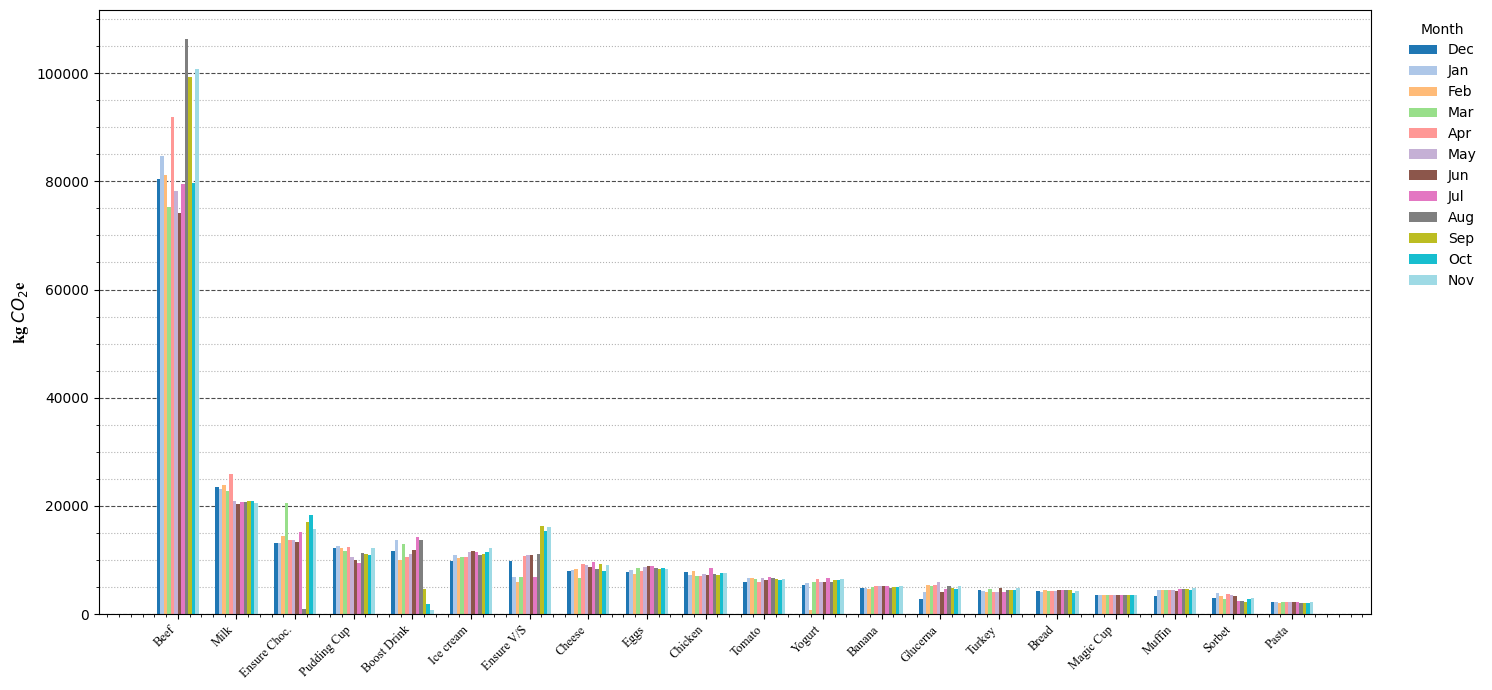

In [792]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ordered months
month_order = ["Dec","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov"]

# Exact ON model names (as you gave)
top20 = [
    "A_beef_consumed_ON",
    "A_milk_consumed_ON",
    "Supp_EnsureChocolate_Water_WheyProtein_Sugar",
    "PuddingCup_Proxy_Milk_Eggs_Sugar_Consumed",
    "Supp_BoostDrink_Water_Sugar_WheyProtein_Poore&Nemecek",
    "S_icecream_consumed_ON",
    "Supp_EnsureVanillaStrawberry_Water_SoyProtein_Milk",
    "A_cheese_consumed_ON",
    "A_egg_consumed_ON",
    "A_chicken_consumed_ON",
    "V_tomato_unheated_greenhouse_consumed_ON",
    "A_yogurt_consumed_ON",
    "F_banana_consumed_ON",
    "Supp_Glucerna_Water_Milk_SoyProtein",
    "Turkey_Proxy_Chicken_Consumed",
    "G_bread_consumed_ON",
    "MagicCup_Proxy_Icecream ",  # ⚠️ trailing space in source
    "Muffin_Proxy_Bread_Sugar",
    "Sorbet_Water_Sugar_Orange",
    "G_pasta_consumed_ON",
    
]

# Helper to clean/aggregate a month table1
def clean_table1(df):
    df = df.copy()
    # normalize column names just in case
    df.columns = [str(c).strip() for c in df.columns]
    # standardize food_items values (strip spaces)
    df["food_items"] = df["food_items"].astype(str).str.strip()
    # ensure numeric
    df["gwp_x_kg"] = pd.to_numeric(df["gwp_x_kg"], errors="coerce")
    # aggregate duplicates by food_items
    df = df.groupby("food_items", as_index=False, dropna=False)["gwp_x_kg"].sum()
    return df

# Collect tidy records across months
records = []
for m in month_order:
    df = globals()[f"{m.lower()}_table1"]
    df = clean_table1(df)
    # pull values for each top20 item; 0 if absent
    for prod in top20:
        val = df.loc[df["food_items"] == prod.strip(), "gwp_x_kg"]
        gwp = float(val.iloc[0]) if len(val) else 0.0
        records.append({"Food_Item": prod, "Month": m, "GWP": gwp})

tidy = pd.DataFrame(records)

# Build pivot with forced orders
df_pivot = (tidy
            .pivot(index="Food_Item", columns="Month", values="GWP")
            .reindex(index=top20, columns=month_order)
            .fillna(0.0)
            .astype(float))


# --- Quick validation (spot check) ---
# Compare a couple of items for Dec against the raw dec_table1
_dec_raw = clean_table1(globals()["dec_table1"]).set_index("food_items")["gwp_x_kg"]
for check_item in ["A_beef_consumed_ON", "A_milk_consumed_ON", "MagicCup_Proxy_Icecream "]:
    v_raw = float(_dec_raw.get(check_item.strip(), 0.0))
    v_piv = float(df_pivot.loc[check_item, "Dec"])
    if not np.isclose(v_raw, v_piv, rtol=0, atol=1e-6):
        print(f"⚠️ Mismatch for {check_item} (Dec): raw={v_raw}, pivot={v_piv}")

# --- Plot (grouped bars) ---
x = np.arange(len(top20))
bar_width = 0.06
colors = plt.cm.tab20(np.linspace(0, 1, len(month_order)))

df_pivot.loc["MagicCup_Proxy_Icecream ",:] = df_pivot.loc["MagicCup_Proxy_Icecream ",'Jan'] / 10
plt.figure(figsize=(15, 7))
for i, m in enumerate(month_order):
    plt.bar(x + i*bar_width, df_pivot[m].values, width=bar_width, color=colors[i], label=m)

# Short x labels for readability (keeps data aligned by index!)
short_labels = [
    "Beef","Milk","Ensure Choc.","Pudding Cup","Boost Drink","Ice cream",
    "Ensure V/S","Cheese","Eggs","Chicken","Tomato","Yogurt","Banana", "Glucerna",
    "Turkey","Bread","Magic Cup","Muffin","Sorbet","Pasta"
]
plt.xticks(x + bar_width*(len(month_order)/2 - 0.5), short_labels, rotation=45, ha="right", 
           fontsize=9, fontname='Times New Roman')

plt.ylabel("kg $CO_2$e", fontsize=12, weight="bold", fontname='Times New Roman')
#plt.title("Monthly GWP of Top 20 Food Products (Dec–Nov)", fontsize=14, weight="bold")
plt.grid(axis='y', linestyle='--', alpha=0.7, c='k')
plt.legend(title="Month", bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False, fontsize=10)

plt.minorticks_on()   # Adds minor grid lines
plt.grid(which='minor', axis='y', linestyle=':', alpha=0.3, c='k')
plt.gca().set_axisbelow(True)   # ensures grid is below bars
plt.tight_layout()
#plt.savefig('top_20_rep_pork.png', dpi=500)
plt.show()

In [799]:
top20 = [
    "A_beef_consumed_ON",
    "A_milk_consumed_ON",
    "Supp_EnsureChocolate_Water_WheyProtein_Sugar",
    "PuddingCup_Proxy_Milk_Eggs_Sugar_Consumed",
    "Supp_BoostDrink_Water_Sugar_WheyProtein_Poore&Nemecek",
    "S_icecream_consumed_ON",
    "Supp_EnsureVanillaStrawberry_Water_SoyProtein_Milk",
    "A_cheese_consumed_ON",
    "A_egg_consumed_ON",
    "A_chicken_consumed_ON",
    "V_tomato_unheated_greenhouse_consumed_ON",
    "A_yogurt_consumed_ON",
    "F_banana_consumed_ON",
    "Supp_Glucerna_Water_Milk_SoyProtein",
    "Turkey_Proxy_Chicken_Consumed",
    "G_bread_consumed_ON",
    "MagicCup_Proxy_Icecream ",  # ⚠️ trailing space in source
    "Muffin_Proxy_Bread_Sugar",
    "Sorbet_Water_Sugar_Orange",
    "G_pasta_consumed_ON",
    
]

In [802]:
top20_df[top20_df['food_items'].isin(top20)]

,food_items,Avg_GWP
0,A_beef_consumed_ON,85927.507877
1,A_milk_consumed_ON,22002.508087
2,Supp_EnsureChocolate_Water_WheyProtein_Sugar,14084.850359
3,PuddingCup_Proxy_Milk_Eggs_Sugar_Consumed,11364.858790
4,S_icecream_consumed_ON,11051.536341
5,Supp_EnsureVanillaStrawberry_Water_SoyProtein_...,10643.370933
6,Supp_BoostDrink_Water_Sugar_WheyProtein_Poore&...,9757.982830
7,A_cheese_consumed_ON,8543.227659
8,A_egg_consumed_ON,8311.556686
9,A_chicken_consumed_ON,7484.495350


In [804]:
top20_df[~top20_df['food_items'].isin(top20)]

,food_items,Avg_GWP
10,Supp_Isosource+HN_MilkProtein_SoyProtein_Water...,7050.292542
19,Haddock_Bianchietal2022,3190.721000
21,F_mandarin_consumed_ON,2426.320817
22,Apple_Oat_Sugar,2365.381517
24,Supp_Peptamen_TF,2144.263800
25,B_coffee_brewed_consumed_ON,2089.164136
26,Vegetables_MontegoBlend,2027.290040
27,F_orange_juice_consumed_ON,1868.004478
28,Peptamen_Water_Sugar_WheyProtein,1856.393867
29,G_oat_consumed_ON,1650.296413


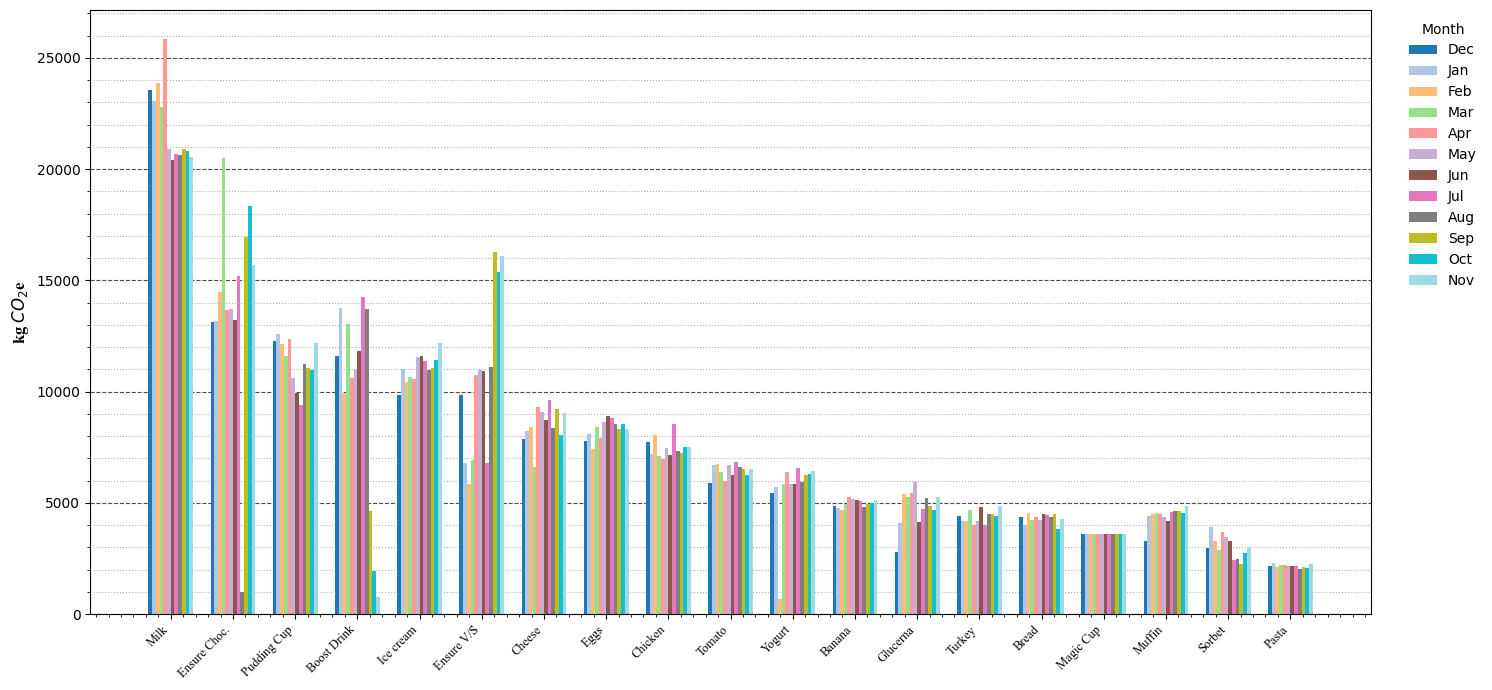

In [807]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ordered months
month_order = ["Dec","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov"]

# Exact ON model names (as you gave)
top20 = [
   # "A_beef_consumed_ON",
    "A_milk_consumed_ON",
    "Supp_EnsureChocolate_Water_WheyProtein_Sugar",
    "PuddingCup_Proxy_Milk_Eggs_Sugar_Consumed",
    "Supp_BoostDrink_Water_Sugar_WheyProtein_Poore&Nemecek",
    "S_icecream_consumed_ON",
    "Supp_EnsureVanillaStrawberry_Water_SoyProtein_Milk",
    "A_cheese_consumed_ON",
    "A_egg_consumed_ON",
    "A_chicken_consumed_ON",
    "V_tomato_unheated_greenhouse_consumed_ON",
    "A_yogurt_consumed_ON",
    "F_banana_consumed_ON",
    "Supp_Glucerna_Water_Milk_SoyProtein",
    "Turkey_Proxy_Chicken_Consumed",
    "G_bread_consumed_ON",
    "MagicCup_Proxy_Icecream ",  # ⚠️ trailing space in source
    "Muffin_Proxy_Bread_Sugar",
    "Sorbet_Water_Sugar_Orange",
    "G_pasta_consumed_ON",
    
]

# Helper to clean/aggregate a month table1
def clean_table1(df):
    df = df.copy()
    # normalize column names just in case
    df.columns = [str(c).strip() for c in df.columns]
    # standardize food_items values (strip spaces)
    df["food_items"] = df["food_items"].astype(str).str.strip()
    # ensure numeric
    df["gwp_x_kg"] = pd.to_numeric(df["gwp_x_kg"], errors="coerce")
    # aggregate duplicates by food_items
    df = df.groupby("food_items", as_index=False, dropna=False)["gwp_x_kg"].sum()
    return df

# Collect tidy records across months
records = []
for m in month_order:
    df = globals()[f"{m.lower()}_table1"]
    df = clean_table1(df)
    # pull values for each top20 item; 0 if absent
    for prod in top20:
        val = df.loc[df["food_items"] == prod.strip(), "gwp_x_kg"]
        gwp = float(val.iloc[0]) if len(val) else 0.0
        records.append({"Food_Item": prod, "Month": m, "GWP": gwp})

tidy = pd.DataFrame(records)

# Build pivot with forced orders
df_pivot = (tidy
            .pivot(index="Food_Item", columns="Month", values="GWP")
            .reindex(index=top20, columns=month_order)
            .fillna(0.0)
            .astype(float))


# --- Quick validation (spot check) ---
# Compare a couple of items for Dec against the raw dec_table1
_dec_raw = clean_table1(globals()["dec_table1"]).set_index("food_items")["gwp_x_kg"]
for check_item in [#"A_beef_consumed_ON", 
                   "A_milk_consumed_ON", "MagicCup_Proxy_Icecream "]:
    v_raw = float(_dec_raw.get(check_item.strip(), 0.0))
    v_piv = float(df_pivot.loc[check_item, "Dec"])
    if not np.isclose(v_raw, v_piv, rtol=0, atol=1e-6):
        print(f"⚠️ Mismatch for {check_item} (Dec): raw={v_raw}, pivot={v_piv}")

# --- Plot (grouped bars) ---
x = np.arange(len(top20))
bar_width = 0.06
colors = plt.cm.tab20(np.linspace(0, 1, len(month_order)))

df_pivot.loc["MagicCup_Proxy_Icecream ",:] = df_pivot.loc["MagicCup_Proxy_Icecream ",'Jan'] / 10
plt.figure(figsize=(15, 7))
for i, m in enumerate(month_order):
    plt.bar(x + i*bar_width, df_pivot[m].values, width=bar_width, color=colors[i], label=m)

# Short x labels for readability (keeps data aligned by index!)
short_labels = [
    #"Beef",
    "Milk","Ensure Choc.","Pudding Cup","Boost Drink","Ice cream",
    "Ensure V/S","Cheese","Eggs","Chicken","Tomato","Yogurt","Banana", "Glucerna",
    "Turkey","Bread","Magic Cup","Muffin","Sorbet","Pasta"
]
plt.xticks(x + bar_width*(len(month_order)/2 - 0.5), short_labels, rotation=45, ha="right", 
           fontsize=9, fontname='Times New Roman')

plt.ylabel("kg $CO_2$e", fontsize=12, weight="bold", fontname='Times New Roman')
#plt.title("Monthly GWP of Top 20 Food Products (Dec–Nov)", fontsize=14, weight="bold")
plt.grid(axis='y', linestyle='--', alpha=0.7, c='k')
plt.legend(title="Month", bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False, fontsize=10)

plt.minorticks_on()   # Adds minor grid lines
plt.grid(which='minor', axis='y', linestyle=':', alpha=0.3, c='k')
plt.gca().set_axisbelow(True)   # ensures grid is below bars
plt.tight_layout()
#plt.savefig('top_20_without_beef.png', dpi=500)
plt.show()